In [2]:
# Import packages
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, plot_loss
from helpers import sgd_with_momentum_update, prep_data,  get_best_epoch, get_results, get_best_dev_epoch, shuffle_data
import numpy as np

In [3]:
def initialize_two_layers(X, h1): 
    '''
    --------------------
    Parameter Initialization
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X [n = 12000])
    --------------------
    Output: 
    weights: Weight terms initialized as random normals
    biases: Bias terms initialized to zero
    --------------------
    '''
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(1, h1)
    
    b1 = np.zeros((h1, 1))
    b2 = np.zeros((1, 1))
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [4]:
def forward_pass_two_layers(X, weights, biases):
    '''
    ----------------------------------
    Forward propogation:
    Send inputs through the network to
    generate output
    ----------------------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    weights: Binary (1/0) training label (shape = n X 1)
    biases:
    --------------------
    Output: 
    activations: vector of results from passing
    inputs through each neuron
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    
    activations = (z1, a1, z2, a2)
    
    return activations

In [5]:
def backpropagation_two_layers(X, y, weights, biases, activations):
    '''
    --------------------
    Backpropagation
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/0) training label (shape = n X 1)
    weights: Current set of weights
    biases: Current set of biases
    activations: Current set of activations
    --------------------
    Output: 
    Derivatives required
    for optimization update
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    z1, a1, z2, a2 = activations
    m = y.shape[1]
    #print(m)   
    
    dz2 = a2 - y
    #print("dz3", dz3.shape)
    
    dW2 = np.dot(dz2, a1.T)/m
    #print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)/m
    #print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    #print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    #print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)/m
    #print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)/m
    #print("db1", db1.shape)
    
    return db1, dW1, db2, dW2

In [6]:
def update_parameters_without_momentum(weights, biases, gradients, learning_rate):
    '''
    --------------------
    Update parameters
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [7]:
def initialize_velocity(weights,biases):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    vw1 = np.zeros(W1.shape)
    vw2 = np.zeros(W2.shape)
    vb1 = np.zeros(b1.shape)
    vb2 = np.zeros(b2.shape)
    return vw1,vw2,vb1,vb2

In [8]:
def update_parameters_with_momentum(weights,biases,gradients,learning_rate,velocity,momentum):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    vw1,vw2,vb1,vb2 = velocity
    W1,vw1 = sgd_with_momentum_update(W1, learning_rate, dW1,vw1,momentum)
    W2,vw2 = sgd_with_momentum_update(W2, learning_rate, dW2,vw2,momentum)
   
    b1,vb1 = sgd_with_momentum_update(b1, learning_rate, db1,vb1,momentum)
    b2,vb2 = sgd_with_momentum_update(b2, learning_rate, db2,vb2,momentum)
    
    weights = (W1, W2)
    biases = (b1, b2)
    velocity = (vw1,vw2,vb1,vb2)
    return weights ,biases,velocity

In [9]:
def output_layer(activations_full):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    y_prob = activations_full[-1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    
    return(y_prob, y_pred)

In [10]:
def batch_training(batch_size, weights, biases, epochs,
                   X, y, momentum_param, lr, X_dev,y_dev, velocity):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    history = {
        "weights": [weights],
        "losses": [], 
        "biases": [biases],
        "accuracies": [],
        "velocity":[velocity],
        "dev_accuracies" :[],
        "dev_loss":[]
    }
    
    
    for epoch in range(epochs):
        
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        velocity = history['velocity'][epoch]
        
        X, y = shuffle_data(X,y)
        
        
        while offset <max(y.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            activations = forward_pass_two_layers(X_batch, weights, biases)
            gradients = backpropagation_two_layers(X_batch, y_batch, weights, biases, activations)
            weights, biases,velocity = update_parameters_with_momentum(weights, biases, gradients, 
                                                                       lr, velocity, momentum_param)
            offset = offset+batch_size
        
        activations_full = forward_pass_two_layers(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)
        
        activations_dev = forward_pass_two_layers(X_dev,weights,biases)
        y_dev_prob =  activations_dev[-1]
        y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)
        
        loss_dev = get_log_loss(y_dev,y_dev_prob)
        accuracy_dev = get_accuracy(y_dev,y_dev_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["velocity"].append(velocity)
        history["accuracies"].append(accuracy)
        history["dev_accuracies"].append(accuracy_dev)
        history['dev_loss'].append(loss_dev)

        if np.isnan(loss):
            break
        print("loss after epoch: ",epoch,": ",loss)
    
    return history

In [11]:
def run_training(data_path, epochs, mode, model_name, h1, lr, batch_size, momentum_param, grid_search = False):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    np.random.seed(1252908)
    
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
    
    if mode == 'full': batch_size = max(y_train.shape)
    elif mode == 'stochastic': batch_size = 1
    
    weights, biases = initialize_two_layers(X_train_flattened, h1)
    velocity = initialize_velocity(weights, biases)
    
    history = batch_training(batch_size, weights, biases, 
                             epochs, X_train_flattened, y_train, 
                             momentum_param, lr, X_dev_flattened, y_dev, 
                             velocity)
    
    best_epoch, _, _ = get_best_epoch(history)
    best_dev_epoch, _, _ = get_best_dev_epoch(history)

    # Plots
    plot_loss("{}_loss.png".format(model_name), history["losses"][:-2])
    plot_loss("{}_accuracy.png".format(model_name), history["accuracies"][:-2], label='Training Accuracy')
    
    # Plot dev loss
    plot_loss("{}_dev_loss.png".format(model_name), history["dev_loss"][:-2], label = 'Dev. Loss')
    plot_loss("{}_dev_accuracy.png".format(model_name), history["dev_accuracies"][:-2], label = "Dev. Accuracy")
    
    # If we are running grid search return the dev. loss to calling function to compare 
    if grid_search:
        activations_dev = forward_pass_two_layers(X_dev_flattened, 
                                                  history["weights"][best_dev_epoch], 
                                                  history["biases"][best_dev_epoch])
        y_prob = activations_dev[-1]
        loss_dev = get_log_loss(y_dev,y_prob)
        accuracy_dev = get_accuracy(y_dev,y_dev_pred)
        return(history, best_epoch, best_dev_epoch, dev_loss)  
        
    else:
        return(history, best_epoch)

In [20]:
def grid_search(data_path, epochs, mode, model_name, h1, 
                lr_grid, batch_size_grid, momentum_grid):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    best_params = {}
    best_params['loss'] = np.inf
    best_params['momentum'] = 0
    best_params['lr'] = 0
    best_params['batch_size'] = 0
    best_params["weights"] = 0
    best_params["biases"] = 0
    
    total_iters = len(momentum_grid)*len(lr_grid)*len(batch_size_grid)
    i = 0
                                     
    for m in momentum_grid:
        for lr in lr_grid:
            for bs in batch_size_grid:
                
                print("We are {} % done!".format(i/total_iters))
                
                history, best_epoch, best_dev_epoch, dev_loss = run_training(data_path, 
                                                                epochs, mode, model_name, 
                                                                h1, lr, bs, m, grid_search = True)
                
                if dev_loss < best_params['loss'] :
                    best_params['momentum'] = m
                    best_params['lr'] = lr
                    best_params['batch_size'] = bs
                    best_params['loss'] = dev_loss
                    best_params["weights"] = history["weights"][best_dev_epoch]
                    best_params["biases"] = history["biases"][best_dev_epoch]
                
                i+=1
            
    return(best_params)           

In [14]:
# Set parameters for momentum and grid search demonstration
modes = ['full', 'stochastic', 'mini']
data_path = '../setup/data'
batch_size = 10
epochs = 200 
h1 = 8 
lr = 0.1

In [15]:
# First we train without momentum
# This is why we set the momentum_param to 0
# This is equivalent to running gradient descent
results_without_momentum = {'full':'', 'stochastic':'', 'batch': ''}
model_name = '../figs/{}_without_momentum'
momentum_param = 0

epoch : 0  batch: 0
loss after epoch:  0 :  8303.165842514649
epoch : 1  batch: 0
loss after epoch:  1 :  8301.54753086857
epoch : 2  batch: 0
loss after epoch:  2 :  8299.931217989142
epoch : 3  batch: 0
loss after epoch:  3 :  8298.309792098298
epoch : 4  batch: 0
loss after epoch:  4 :  8296.67683555981
epoch : 5  batch: 0
loss after epoch:  5 :  8295.0265025654
epoch : 6  batch: 0
loss after epoch:  6 :  8293.353415722999
epoch : 7  batch: 0
loss after epoch:  7 :  8291.652578483508
epoch : 8  batch: 0
loss after epoch:  8 :  8289.919300831014
epoch : 9  batch: 0
loss after epoch:  9 :  8288.149136071512
epoch : 10  batch: 0
loss after epoch:  10 :  8286.337826899731
epoch : 11  batch: 0
loss after epoch:  11 :  8284.481259213124
epoch : 12  batch: 0
loss after epoch:  12 :  8282.575422385316
epoch : 13  batch: 0
loss after epoch:  13 :  8280.616374915782
epoch : 14  batch: 0
loss after epoch:  14 :  8278.600214544458
epoch : 15  batch: 0
loss after epoch:  15 :  8276.523052064627


loss after epoch:  128 :  6275.441873599989
epoch : 129  batch: 0
loss after epoch:  129 :  6241.208494867784
epoch : 130  batch: 0
loss after epoch:  130 :  6206.978082639998
epoch : 131  batch: 0
loss after epoch:  131 :  6172.758774259782
epoch : 132  batch: 0
loss after epoch:  132 :  6138.558422670638
epoch : 133  batch: 0
loss after epoch:  133 :  6104.384598879833
epoch : 134  batch: 0
loss after epoch:  134 :  6070.244595225235
epoch : 135  batch: 0
loss after epoch:  135 :  6036.145429422876
epoch : 136  batch: 0
loss after epoch:  136 :  6002.093849368268
epoch : 137  batch: 0
loss after epoch:  137 :  5968.096338659726
epoch : 138  batch: 0
loss after epoch:  138 :  5934.159122806683
epoch : 139  batch: 0
loss after epoch:  139 :  5900.288176080496
epoch : 140  batch: 0
loss after epoch:  140 :  5866.489228959773
epoch : 141  batch: 0
loss after epoch:  141 :  5832.767776116871
epoch : 142  batch: 0
loss after epoch:  142 :  5799.129084887198
epoch : 143  batch: 0
loss after

epoch : 10  batch: 7000
epoch : 10  batch: 8000
epoch : 10  batch: 9000
epoch : 10  batch: 10000
epoch : 10  batch: 11000
loss after epoch:  10 :  884.4013764231256
epoch : 11  batch: 0
epoch : 11  batch: 1000
epoch : 11  batch: 2000
epoch : 11  batch: 3000
epoch : 11  batch: 4000
epoch : 11  batch: 5000
epoch : 11  batch: 6000
epoch : 11  batch: 7000
epoch : 11  batch: 8000
epoch : 11  batch: 9000
epoch : 11  batch: 10000
epoch : 11  batch: 11000
loss after epoch:  11 :  644.0360003639494
epoch : 12  batch: 0
epoch : 12  batch: 1000
epoch : 12  batch: 2000
epoch : 12  batch: 3000
epoch : 12  batch: 4000
epoch : 12  batch: 5000
epoch : 12  batch: 6000
epoch : 12  batch: 7000
epoch : 12  batch: 8000
epoch : 12  batch: 9000
epoch : 12  batch: 10000
epoch : 12  batch: 11000
loss after epoch:  12 :  763.2445283376125
epoch : 13  batch: 0
epoch : 13  batch: 1000
epoch : 13  batch: 2000
epoch : 13  batch: 3000
epoch : 13  batch: 4000
epoch : 13  batch: 5000
epoch : 13  batch: 6000
epoch : 13

epoch : 35  batch: 5000
epoch : 35  batch: 6000
epoch : 35  batch: 7000
epoch : 35  batch: 8000
epoch : 35  batch: 9000
epoch : 35  batch: 10000
epoch : 35  batch: 11000
loss after epoch:  35 :  387.14057896971013
epoch : 36  batch: 0
epoch : 36  batch: 1000
epoch : 36  batch: 2000
epoch : 36  batch: 3000
epoch : 36  batch: 4000
epoch : 36  batch: 5000
epoch : 36  batch: 6000
epoch : 36  batch: 7000
epoch : 36  batch: 8000
epoch : 36  batch: 9000
epoch : 36  batch: 10000
epoch : 36  batch: 11000
loss after epoch:  36 :  406.3080501516058
epoch : 37  batch: 0
epoch : 37  batch: 1000
epoch : 37  batch: 2000
epoch : 37  batch: 3000
epoch : 37  batch: 4000
epoch : 37  batch: 5000
epoch : 37  batch: 6000
epoch : 37  batch: 7000
epoch : 37  batch: 8000
epoch : 37  batch: 9000
epoch : 37  batch: 10000
epoch : 37  batch: 11000
loss after epoch:  37 :  396.2547098821939
epoch : 38  batch: 0
epoch : 38  batch: 1000
epoch : 38  batch: 2000
epoch : 38  batch: 3000
epoch : 38  batch: 4000
epoch : 3

epoch : 60  batch: 3000
epoch : 60  batch: 4000
epoch : 60  batch: 5000
epoch : 60  batch: 6000
epoch : 60  batch: 7000
epoch : 60  batch: 8000
epoch : 60  batch: 9000
epoch : 60  batch: 10000
epoch : 60  batch: 11000
loss after epoch:  60 :  264.85861015697236
epoch : 61  batch: 0
epoch : 61  batch: 1000
epoch : 61  batch: 2000
epoch : 61  batch: 3000
epoch : 61  batch: 4000
epoch : 61  batch: 5000
epoch : 61  batch: 6000
epoch : 61  batch: 7000
epoch : 61  batch: 8000
epoch : 61  batch: 9000
epoch : 61  batch: 10000
epoch : 61  batch: 11000
loss after epoch:  61 :  266.8504172800589
epoch : 62  batch: 0
epoch : 62  batch: 1000
epoch : 62  batch: 2000
epoch : 62  batch: 3000
epoch : 62  batch: 4000
epoch : 62  batch: 5000
epoch : 62  batch: 6000
epoch : 62  batch: 7000
epoch : 62  batch: 8000
epoch : 62  batch: 9000
epoch : 62  batch: 10000
epoch : 62  batch: 11000
loss after epoch:  62 :  258.6789705033526
epoch : 63  batch: 0
epoch : 63  batch: 1000
epoch : 63  batch: 2000
epoch : 6

epoch : 85  batch: 1000
epoch : 85  batch: 2000
epoch : 85  batch: 3000
epoch : 85  batch: 4000
epoch : 85  batch: 5000
epoch : 85  batch: 6000
epoch : 85  batch: 7000
epoch : 85  batch: 8000
epoch : 85  batch: 9000
epoch : 85  batch: 10000
epoch : 85  batch: 11000
loss after epoch:  85 :  262.1038208870453
epoch : 86  batch: 0
epoch : 86  batch: 1000
epoch : 86  batch: 2000
epoch : 86  batch: 3000
epoch : 86  batch: 4000
epoch : 86  batch: 5000
epoch : 86  batch: 6000
epoch : 86  batch: 7000
epoch : 86  batch: 8000
epoch : 86  batch: 9000
epoch : 86  batch: 10000
epoch : 86  batch: 11000
loss after epoch:  86 :  261.64581306249596
epoch : 87  batch: 0
epoch : 87  batch: 1000
epoch : 87  batch: 2000
epoch : 87  batch: 3000
epoch : 87  batch: 4000
epoch : 87  batch: 5000
epoch : 87  batch: 6000
epoch : 87  batch: 7000
epoch : 87  batch: 8000
epoch : 87  batch: 9000
epoch : 87  batch: 10000
epoch : 87  batch: 11000
loss after epoch:  87 :  262.4803933586908
epoch : 88  batch: 0
epoch : 8

epoch : 109  batch: 8000
epoch : 109  batch: 9000
epoch : 109  batch: 10000
epoch : 109  batch: 11000
loss after epoch:  109 :  422.96646508476607
epoch : 110  batch: 0
epoch : 110  batch: 1000
epoch : 110  batch: 2000
epoch : 110  batch: 3000
epoch : 110  batch: 4000
epoch : 110  batch: 5000
epoch : 110  batch: 6000
epoch : 110  batch: 7000
epoch : 110  batch: 8000
epoch : 110  batch: 9000
epoch : 110  batch: 10000
epoch : 110  batch: 11000
loss after epoch:  110 :  286.18221518739483
epoch : 111  batch: 0
epoch : 111  batch: 1000
epoch : 111  batch: 2000
epoch : 111  batch: 3000
epoch : 111  batch: 4000
epoch : 111  batch: 5000
epoch : 111  batch: 6000
epoch : 111  batch: 7000
epoch : 111  batch: 8000
epoch : 111  batch: 9000
epoch : 111  batch: 10000
epoch : 111  batch: 11000
loss after epoch:  111 :  312.8860505663904
epoch : 112  batch: 0
epoch : 112  batch: 1000
epoch : 112  batch: 2000
epoch : 112  batch: 3000
epoch : 112  batch: 4000
epoch : 112  batch: 5000
epoch : 112  batch:

epoch : 133  batch: 6000
epoch : 133  batch: 7000
epoch : 133  batch: 8000
epoch : 133  batch: 9000
epoch : 133  batch: 10000
epoch : 133  batch: 11000
loss after epoch:  133 :  212.2321356320054
epoch : 134  batch: 0
epoch : 134  batch: 1000
epoch : 134  batch: 2000
epoch : 134  batch: 3000
epoch : 134  batch: 4000
epoch : 134  batch: 5000
epoch : 134  batch: 6000
epoch : 134  batch: 7000
epoch : 134  batch: 8000
epoch : 134  batch: 9000
epoch : 134  batch: 10000
epoch : 134  batch: 11000
loss after epoch:  134 :  470.0239681974374
epoch : 135  batch: 0
epoch : 135  batch: 1000
epoch : 135  batch: 2000
epoch : 135  batch: 3000
epoch : 135  batch: 4000
epoch : 135  batch: 5000
epoch : 135  batch: 6000
epoch : 135  batch: 7000
epoch : 135  batch: 8000
epoch : 135  batch: 9000
epoch : 135  batch: 10000
epoch : 135  batch: 11000
loss after epoch:  135 :  208.77869041741826
epoch : 136  batch: 0
epoch : 136  batch: 1000
epoch : 136  batch: 2000
epoch : 136  batch: 3000
epoch : 136  batch: 

epoch : 157  batch: 4000
epoch : 157  batch: 5000
epoch : 157  batch: 6000
epoch : 157  batch: 7000
epoch : 157  batch: 8000
epoch : 157  batch: 9000
epoch : 157  batch: 10000
epoch : 157  batch: 11000
loss after epoch:  157 :  195.10729386203428
epoch : 158  batch: 0
epoch : 158  batch: 1000
epoch : 158  batch: 2000
epoch : 158  batch: 3000
epoch : 158  batch: 4000
epoch : 158  batch: 5000
epoch : 158  batch: 6000
epoch : 158  batch: 7000
epoch : 158  batch: 8000
epoch : 158  batch: 9000
epoch : 158  batch: 10000
epoch : 158  batch: 11000
loss after epoch:  158 :  195.17552617496352
epoch : 159  batch: 0
epoch : 159  batch: 1000
epoch : 159  batch: 2000
epoch : 159  batch: 3000
epoch : 159  batch: 4000
epoch : 159  batch: 5000
epoch : 159  batch: 6000
epoch : 159  batch: 7000
epoch : 159  batch: 8000
epoch : 159  batch: 9000
epoch : 159  batch: 10000
epoch : 159  batch: 11000
loss after epoch:  159 :  189.2929245316636
epoch : 160  batch: 0
epoch : 160  batch: 1000
epoch : 160  batch:

epoch : 181  batch: 2000
epoch : 181  batch: 3000
epoch : 181  batch: 4000
epoch : 181  batch: 5000
epoch : 181  batch: 6000
epoch : 181  batch: 7000
epoch : 181  batch: 8000
epoch : 181  batch: 9000
epoch : 181  batch: 10000
epoch : 181  batch: 11000
loss after epoch:  181 :  182.44449051959833
epoch : 182  batch: 0
epoch : 182  batch: 1000
epoch : 182  batch: 2000
epoch : 182  batch: 3000
epoch : 182  batch: 4000
epoch : 182  batch: 5000
epoch : 182  batch: 6000
epoch : 182  batch: 7000
epoch : 182  batch: 8000
epoch : 182  batch: 9000
epoch : 182  batch: 10000
epoch : 182  batch: 11000
loss after epoch:  182 :  183.04453140958555
epoch : 183  batch: 0
epoch : 183  batch: 1000
epoch : 183  batch: 2000
epoch : 183  batch: 3000
epoch : 183  batch: 4000
epoch : 183  batch: 5000
epoch : 183  batch: 6000
epoch : 183  batch: 7000
epoch : 183  batch: 8000
epoch : 183  batch: 9000
epoch : 183  batch: 10000
epoch : 183  batch: 11000
loss after epoch:  183 :  172.0729053724191
epoch : 184  bat

epoch : 5  batch: 6000
epoch : 5  batch: 7000
epoch : 5  batch: 8000
epoch : 5  batch: 9000
epoch : 5  batch: 10000
epoch : 5  batch: 11000
loss after epoch:  5 :  783.9047858158674
epoch : 6  batch: 0
epoch : 6  batch: 1000
epoch : 6  batch: 2000
epoch : 6  batch: 3000
epoch : 6  batch: 4000
epoch : 6  batch: 5000
epoch : 6  batch: 6000
epoch : 6  batch: 7000
epoch : 6  batch: 8000
epoch : 6  batch: 9000
epoch : 6  batch: 10000
epoch : 6  batch: 11000
loss after epoch:  6 :  753.5426826027967
epoch : 7  batch: 0
epoch : 7  batch: 1000
epoch : 7  batch: 2000
epoch : 7  batch: 3000
epoch : 7  batch: 4000
epoch : 7  batch: 5000
epoch : 7  batch: 6000
epoch : 7  batch: 7000
epoch : 7  batch: 8000
epoch : 7  batch: 9000
epoch : 7  batch: 10000
epoch : 7  batch: 11000
loss after epoch:  7 :  699.4006895029877
epoch : 8  batch: 0
epoch : 8  batch: 1000
epoch : 8  batch: 2000
epoch : 8  batch: 3000
epoch : 8  batch: 4000
epoch : 8  batch: 5000
epoch : 8  batch: 6000
epoch : 8  batch: 7000
epo

epoch : 30  batch: 9000
epoch : 30  batch: 10000
epoch : 30  batch: 11000
loss after epoch:  30 :  266.9260494647974
epoch : 31  batch: 0
epoch : 31  batch: 1000
epoch : 31  batch: 2000
epoch : 31  batch: 3000
epoch : 31  batch: 4000
epoch : 31  batch: 5000
epoch : 31  batch: 6000
epoch : 31  batch: 7000
epoch : 31  batch: 8000
epoch : 31  batch: 9000
epoch : 31  batch: 10000
epoch : 31  batch: 11000
loss after epoch:  31 :  273.47552497426426
epoch : 32  batch: 0
epoch : 32  batch: 1000
epoch : 32  batch: 2000
epoch : 32  batch: 3000
epoch : 32  batch: 4000
epoch : 32  batch: 5000
epoch : 32  batch: 6000
epoch : 32  batch: 7000
epoch : 32  batch: 8000
epoch : 32  batch: 9000
epoch : 32  batch: 10000
epoch : 32  batch: 11000
loss after epoch:  32 :  246.53840827421874
epoch : 33  batch: 0
epoch : 33  batch: 1000
epoch : 33  batch: 2000
epoch : 33  batch: 3000
epoch : 33  batch: 4000
epoch : 33  batch: 5000
epoch : 33  batch: 6000
epoch : 33  batch: 7000
epoch : 33  batch: 8000
epoch : 

epoch : 55  batch: 11000
loss after epoch:  55 :  112.84142770381007
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch : 56  batch: 11000
loss after epoch:  56 :  114.70587827996815
epoch : 57  batch: 0
epoch : 57  batch: 1000
epoch : 57  batch: 2000
epoch : 57  batch: 3000
epoch : 57  batch: 4000
epoch : 57  batch: 5000
epoch : 57  batch: 6000
epoch : 57  batch: 7000
epoch : 57  batch: 8000
epoch : 57  batch: 9000
epoch : 57  batch: 10000
epoch : 57  batch: 11000
loss after epoch:  57 :  152.94139187425822
epoch : 58  batch: 0
epoch : 58  batch: 1000
epoch : 58  batch: 2000
epoch : 58  batch: 3000
epoch : 58  batch: 4000
epoch : 58  batch: 5000
epoch : 58  batch: 6000
epoch : 58  batch: 7000
epoch : 58  batch: 8000
epoch : 58  batch: 9000
epoch : 58  batch: 10000
epoch :

epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
loss after epoch:  80 :  61.84128797553577
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss after epoch:  81 :  60.683332383852836
epoch : 82  batch: 0
epoch : 82  batch: 1000
epoch : 82  batch: 2000
epoch : 82  batch: 3000
epoch : 82  batch: 4000
epoch : 82  batch: 5000
epoch : 82  batch: 6000
epoch : 82  batch: 7000
epoch : 82  batch: 8000
epoch : 82  batch: 9000
epoch : 82  batch: 10000
epoch : 82  batch: 11000
loss after epoch:  82 :  66.15962220945065
epoch : 83  batch: 0
epoch : 83  batch: 1000
epoch : 83  batch: 2000
epoch : 83  batch: 3000
epoch : 83  batch: 4000
epoch : 83  batch: 5000
epoch : 83  batch: 6000
epoch : 83  batch: 7000
epoch : 83  batch: 8000
epoch : 8

epoch : 105  batch: 11000
loss after epoch:  105 :  43.50243738660451
epoch : 106  batch: 0
epoch : 106  batch: 1000
epoch : 106  batch: 2000
epoch : 106  batch: 3000
epoch : 106  batch: 4000
epoch : 106  batch: 5000
epoch : 106  batch: 6000
epoch : 106  batch: 7000
epoch : 106  batch: 8000
epoch : 106  batch: 9000
epoch : 106  batch: 10000
epoch : 106  batch: 11000
loss after epoch:  106 :  43.95079956293951
epoch : 107  batch: 0
epoch : 107  batch: 1000
epoch : 107  batch: 2000
epoch : 107  batch: 3000
epoch : 107  batch: 4000
epoch : 107  batch: 5000
epoch : 107  batch: 6000
epoch : 107  batch: 7000
epoch : 107  batch: 8000
epoch : 107  batch: 9000
epoch : 107  batch: 10000
epoch : 107  batch: 11000
loss after epoch:  107 :  43.05526055698185
epoch : 108  batch: 0
epoch : 108  batch: 1000
epoch : 108  batch: 2000
epoch : 108  batch: 3000
epoch : 108  batch: 4000
epoch : 108  batch: 5000
epoch : 108  batch: 6000
epoch : 108  batch: 7000
epoch : 108  batch: 8000
epoch : 108  batch: 90

loss after epoch:  129 :  31.44645507662727
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch: 4000
epoch : 130  batch: 5000
epoch : 130  batch: 6000
epoch : 130  batch: 7000
epoch : 130  batch: 8000
epoch : 130  batch: 9000
epoch : 130  batch: 10000
epoch : 130  batch: 11000
loss after epoch:  130 :  30.288059762403325
epoch : 131  batch: 0
epoch : 131  batch: 1000
epoch : 131  batch: 2000
epoch : 131  batch: 3000
epoch : 131  batch: 4000
epoch : 131  batch: 5000
epoch : 131  batch: 6000
epoch : 131  batch: 7000
epoch : 131  batch: 8000
epoch : 131  batch: 9000
epoch : 131  batch: 10000
epoch : 131  batch: 11000
loss after epoch:  131 :  29.72602556426504
epoch : 132  batch: 0
epoch : 132  batch: 1000
epoch : 132  batch: 2000
epoch : 132  batch: 3000
epoch : 132  batch: 4000
epoch : 132  batch: 5000
epoch : 132  batch: 6000
epoch : 132  batch: 7000
epoch : 132  batch: 8000
epoch : 132  batch: 9000
epoch : 132  batch: 10

epoch : 154  batch: 1000
epoch : 154  batch: 2000
epoch : 154  batch: 3000
epoch : 154  batch: 4000
epoch : 154  batch: 5000
epoch : 154  batch: 6000
epoch : 154  batch: 7000
epoch : 154  batch: 8000
epoch : 154  batch: 9000
epoch : 154  batch: 10000
epoch : 154  batch: 11000
loss after epoch:  154 :  22.896473756732167
epoch : 155  batch: 0
epoch : 155  batch: 1000
epoch : 155  batch: 2000
epoch : 155  batch: 3000
epoch : 155  batch: 4000
epoch : 155  batch: 5000
epoch : 155  batch: 6000
epoch : 155  batch: 7000
epoch : 155  batch: 8000
epoch : 155  batch: 9000
epoch : 155  batch: 10000
epoch : 155  batch: 11000
loss after epoch:  155 :  22.73452296665937
epoch : 156  batch: 0
epoch : 156  batch: 1000
epoch : 156  batch: 2000
epoch : 156  batch: 3000
epoch : 156  batch: 4000
epoch : 156  batch: 5000
epoch : 156  batch: 6000
epoch : 156  batch: 7000
epoch : 156  batch: 8000
epoch : 156  batch: 9000
epoch : 156  batch: 10000
epoch : 156  batch: 11000
loss after epoch:  156 :  22.1609852

epoch : 178  batch: 1000
epoch : 178  batch: 2000
epoch : 178  batch: 3000
epoch : 178  batch: 4000
epoch : 178  batch: 5000
epoch : 178  batch: 6000
epoch : 178  batch: 7000
epoch : 178  batch: 8000
epoch : 178  batch: 9000
epoch : 178  batch: 10000
epoch : 178  batch: 11000
loss after epoch:  178 :  18.682934874548284
epoch : 179  batch: 0
epoch : 179  batch: 1000
epoch : 179  batch: 2000
epoch : 179  batch: 3000
epoch : 179  batch: 4000
epoch : 179  batch: 5000
epoch : 179  batch: 6000
epoch : 179  batch: 7000
epoch : 179  batch: 8000
epoch : 179  batch: 9000
epoch : 179  batch: 10000
epoch : 179  batch: 11000
loss after epoch:  179 :  18.369197564187388
epoch : 180  batch: 0
epoch : 180  batch: 1000
epoch : 180  batch: 2000
epoch : 180  batch: 3000
epoch : 180  batch: 4000
epoch : 180  batch: 5000
epoch : 180  batch: 6000
epoch : 180  batch: 7000
epoch : 180  batch: 8000
epoch : 180  batch: 9000
epoch : 180  batch: 10000
epoch : 180  batch: 11000
loss after epoch:  180 :  17.795910

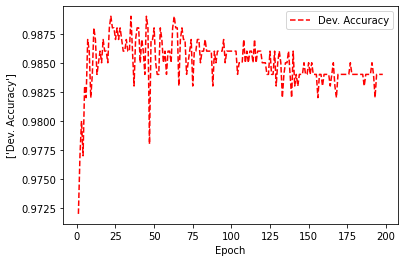

In [16]:
# We go through each mode with the training call
for mode in modes:
    fig_name = model_name.format(mode)
    results_without_momentum[mode] = run_training(data_path, 
                                                  epochs, mode, fig_name, h1, 
                                                  lr, batch_size, momentum_param)

In [17]:
# Now we conduct the same rounds of training with momentum
results_with_momentum = {'full':'', 'stochastic':'', 'batch': ''}
model_name = '../figs/{}_with_momentum'
momentum_param = 0.9

epoch : 0  batch: 0
loss after epoch:  0 :  8303.165842514649
epoch : 1  batch: 0
loss after epoch:  1 :  8300.092666263663
epoch : 2  batch: 0
loss after epoch:  2 :  8295.727533156947
epoch : 3  batch: 0
loss after epoch:  3 :  8290.151457916403
epoch : 4  batch: 0
loss after epoch:  4 :  8283.339271100314
epoch : 5  batch: 0
loss after epoch:  5 :  8275.141414462207
epoch : 6  batch: 0
loss after epoch:  6 :  8265.282898383044
epoch : 7  batch: 0
loss after epoch:  7 :  8253.374182203706
epoch : 8  batch: 0
loss after epoch:  8 :  8238.924901093913
epoch : 9  batch: 0
loss after epoch:  9 :  8221.350477135555
epoch : 10  batch: 0
loss after epoch:  10 :  8199.963367398763
epoch : 11  batch: 0
loss after epoch:  11 :  8173.9443134098055
epoch : 12  batch: 0
loss after epoch:  12 :  8142.294029749707
epoch : 13  batch: 0
loss after epoch:  13 :  8103.772749457335
epoch : 14  batch: 0
loss after epoch:  14 :  8056.845499857369
epoch : 15  batch: 0
loss after epoch:  15 :  7999.66674994

epoch : 128  batch: 0
loss after epoch:  128 :  1354.3348407964718
epoch : 129  batch: 0
loss after epoch:  129 :  1351.4733892773943
epoch : 130  batch: 0
loss after epoch:  130 :  1348.6418694949275
epoch : 131  batch: 0
loss after epoch:  131 :  1345.8394864997772
epoch : 132  batch: 0
loss after epoch:  132 :  1343.0654659957454
epoch : 133  batch: 0
loss after epoch:  133 :  1340.3190463849423
epoch : 134  batch: 0
loss after epoch:  134 :  1337.5994811460996
epoch : 135  batch: 0
loss after epoch:  135 :  1334.9060415683623
epoch : 136  batch: 0
loss after epoch:  136 :  1332.2380135946282
epoch : 137  batch: 0
loss after epoch:  137 :  1329.5946914120084
epoch : 138  batch: 0
loss after epoch:  138 :  1326.9753747797004
epoch : 139  batch: 0
loss after epoch:  139 :  1324.3793735137879
epoch : 140  batch: 0
loss after epoch:  140 :  1321.8060159256834
epoch : 141  batch: 0
loss after epoch:  141 :  1319.2546552126073
epoch : 142  batch: 0
loss after epoch:  142 :  1316.724670784

/Users/akshatgoel/Documents/code/intro-dl/src/helpers.py:170: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  10091.791093132935
epoch : 5  batch: 0
epoch : 5  batch: 1000
epoch : 5  batch: 2000
epoch : 5  batch: 3000
epoch : 5  batch: 4000
epoch : 5  batch: 5000
epoch : 5  batch: 6000
epoch : 5  batch: 7000
epoch : 5  batch: 8000
epoch : 5  batch: 9000
epoch : 5  batch: 10000
epoch : 5  batch: 11000
loss after epoch:  5 :  3419.7251456620206
epoch : 6  batch: 0
epoch : 6  batch: 1000
epoch : 6  batch: 2000
epoch : 6  batch: 3000
epoch : 6  batch: 4000
epoch : 6  batch: 5000
epoch : 6  batch: 6000
epoch : 6  batch: 7000
epoch : 6  batch: 8000
epoch : 6  batch: 9000
epoch : 6  batch: 10000
epoch : 6  batch: 11000
loss after epoch:  6 :  2682.508615185155
epoch : 7  batch: 0
epoch : 7  batch: 1000
epoch : 7  batch: 2000
epoch : 7  batch: 3000
e

epoch : 29  batch: 3000
epoch : 29  batch: 4000
epoch : 29  batch: 5000
epoch : 29  batch: 6000
epoch : 29  batch: 7000
epoch : 29  batch: 8000
epoch : 29  batch: 9000
epoch : 29  batch: 10000
epoch : 29  batch: 11000
loss after epoch:  29 :  2327.2747992085297
epoch : 30  batch: 0
epoch : 30  batch: 1000
epoch : 30  batch: 2000
epoch : 30  batch: 3000
epoch : 30  batch: 4000
epoch : 30  batch: 5000
epoch : 30  batch: 6000
epoch : 30  batch: 7000
epoch : 30  batch: 8000
epoch : 30  batch: 9000
epoch : 30  batch: 10000
epoch : 30  batch: 11000
loss after epoch:  30 :  2556.0459073918328
epoch : 31  batch: 0
epoch : 31  batch: 1000
epoch : 31  batch: 2000
epoch : 31  batch: 3000
epoch : 31  batch: 4000
epoch : 31  batch: 5000
epoch : 31  batch: 6000
epoch : 31  batch: 7000
epoch : 31  batch: 8000
epoch : 31  batch: 9000
epoch : 31  batch: 10000
epoch : 31  batch: 11000
loss after epoch:  31 :  2437.9970348324337
epoch : 32  batch: 0
epoch : 32  batch: 1000
epoch : 32  batch: 2000
epoch :

epoch : 54  batch: 1000
epoch : 54  batch: 2000
epoch : 54  batch: 3000
epoch : 54  batch: 4000
epoch : 54  batch: 5000
epoch : 54  batch: 6000
epoch : 54  batch: 7000
epoch : 54  batch: 8000
epoch : 54  batch: 9000
epoch : 54  batch: 10000
epoch : 54  batch: 11000
loss after epoch:  54 :  1851.0207362609701
epoch : 55  batch: 0
epoch : 55  batch: 1000
epoch : 55  batch: 2000
epoch : 55  batch: 3000
epoch : 55  batch: 4000
epoch : 55  batch: 5000
epoch : 55  batch: 6000
epoch : 55  batch: 7000
epoch : 55  batch: 8000
epoch : 55  batch: 9000
epoch : 55  batch: 10000
epoch : 55  batch: 11000
loss after epoch:  55 :  2899.869768301107
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch : 56  batch: 11000
loss after epoch:  56 :  2907.3126320701303
epoch : 57  batch: 0
epoch : 

loss after epoch:  78 :  2337.6217251782027
epoch : 79  batch: 0
epoch : 79  batch: 1000
epoch : 79  batch: 2000
epoch : 79  batch: 3000
epoch : 79  batch: 4000
epoch : 79  batch: 5000
epoch : 79  batch: 6000
epoch : 79  batch: 7000
epoch : 79  batch: 8000
epoch : 79  batch: 9000
epoch : 79  batch: 10000
epoch : 79  batch: 11000
loss after epoch:  79 :  1754.8939798461813
epoch : 80  batch: 0
epoch : 80  batch: 1000
epoch : 80  batch: 2000
epoch : 80  batch: 3000
epoch : 80  batch: 4000
epoch : 80  batch: 5000
epoch : 80  batch: 6000
epoch : 80  batch: 7000
epoch : 80  batch: 8000
epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
loss after epoch:  80 :  1772.8680411177138
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss af

epoch : 103  batch: 8000
epoch : 103  batch: 9000
epoch : 103  batch: 10000
epoch : 103  batch: 11000
loss after epoch:  103 :  1383.2037119150089
epoch : 104  batch: 0
epoch : 104  batch: 1000
epoch : 104  batch: 2000
epoch : 104  batch: 3000
epoch : 104  batch: 4000
epoch : 104  batch: 5000
epoch : 104  batch: 6000
epoch : 104  batch: 7000
epoch : 104  batch: 8000
epoch : 104  batch: 9000
epoch : 104  batch: 10000
epoch : 104  batch: 11000
loss after epoch:  104 :  1741.475963747769
epoch : 105  batch: 0
epoch : 105  batch: 1000
epoch : 105  batch: 2000
epoch : 105  batch: 3000
epoch : 105  batch: 4000
epoch : 105  batch: 5000
epoch : 105  batch: 6000
epoch : 105  batch: 7000
epoch : 105  batch: 8000
epoch : 105  batch: 9000
epoch : 105  batch: 10000
epoch : 105  batch: 11000
loss after epoch:  105 :  1625.1270355716883
epoch : 106  batch: 0
epoch : 106  batch: 1000
epoch : 106  batch: 2000
epoch : 106  batch: 3000
epoch : 106  batch: 4000
epoch : 106  batch: 5000
epoch : 106  batch:

epoch : 127  batch: 6000
epoch : 127  batch: 7000
epoch : 127  batch: 8000
epoch : 127  batch: 9000
epoch : 127  batch: 10000
epoch : 127  batch: 11000
loss after epoch:  127 :  1816.3488608008201
epoch : 128  batch: 0
epoch : 128  batch: 1000
epoch : 128  batch: 2000
epoch : 128  batch: 3000
epoch : 128  batch: 4000
epoch : 128  batch: 5000
epoch : 128  batch: 6000
epoch : 128  batch: 7000
epoch : 128  batch: 8000
epoch : 128  batch: 9000
epoch : 128  batch: 10000
epoch : 128  batch: 11000
loss after epoch:  128 :  1501.8131204199738
epoch : 129  batch: 0
epoch : 129  batch: 1000
epoch : 129  batch: 2000
epoch : 129  batch: 3000
epoch : 129  batch: 4000
epoch : 129  batch: 5000
epoch : 129  batch: 6000
epoch : 129  batch: 7000
epoch : 129  batch: 8000
epoch : 129  batch: 9000
epoch : 129  batch: 10000
epoch : 129  batch: 11000
loss after epoch:  129 :  1538.5281388015574
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch

epoch : 151  batch: 4000
epoch : 151  batch: 5000
epoch : 151  batch: 6000
epoch : 151  batch: 7000
epoch : 151  batch: 8000
epoch : 151  batch: 9000
epoch : 151  batch: 10000
epoch : 151  batch: 11000
loss after epoch:  151 :  1352.0138861455819
epoch : 152  batch: 0
epoch : 152  batch: 1000
epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
loss after epoch:  152 :  2900.9332250938355
epoch : 153  batch: 0
epoch : 153  batch: 1000
epoch : 153  batch: 2000
epoch : 153  batch: 3000
epoch : 153  batch: 4000
epoch : 153  batch: 5000
epoch : 153  batch: 6000
epoch : 153  batch: 7000
epoch : 153  batch: 8000
epoch : 153  batch: 9000
epoch : 153  batch: 10000
epoch : 153  batch: 11000
loss after epoch:  153 :  1343.3404680585013
epoch : 154  batch: 0
epoch : 154  batch: 1000
epoch : 154  batch

epoch : 175  batch: 2000
epoch : 175  batch: 3000
epoch : 175  batch: 4000
epoch : 175  batch: 5000
epoch : 175  batch: 6000
epoch : 175  batch: 7000
epoch : 175  batch: 8000
epoch : 175  batch: 9000
epoch : 175  batch: 10000
epoch : 175  batch: 11000
loss after epoch:  175 :  1487.9229398863645
epoch : 176  batch: 0
epoch : 176  batch: 1000
epoch : 176  batch: 2000
epoch : 176  batch: 3000
epoch : 176  batch: 4000
epoch : 176  batch: 5000
epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
loss after epoch:  176 :  1439.4302854339198
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6000
epoch : 177  batch: 7000
epoch : 177  batch: 8000
epoch : 177  batch: 9000
epoch : 177  batch: 10000
epoch : 177  batch: 11000
loss after epoch:  177 :  2986.3632590399034
epoch : 178  ba

epoch : 199  batch: 1000
epoch : 199  batch: 2000
epoch : 199  batch: 3000
epoch : 199  batch: 4000
epoch : 199  batch: 5000
epoch : 199  batch: 6000
epoch : 199  batch: 7000
epoch : 199  batch: 8000
epoch : 199  batch: 9000
epoch : 199  batch: 10000
epoch : 199  batch: 11000
loss after epoch:  199 :  1854.041156258477
best accuracy: 0.9788333333333333
best loss: 1254.1184244266851
best epoch: 150
best dev accuracy: 0.9803333333333333
best dev loss: 1261.143356016004
best dev epoch: 167
epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  1327.547670354419
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1 

epoch : 24  batch: 0
epoch : 24  batch: 1000
epoch : 24  batch: 2000
epoch : 24  batch: 3000
epoch : 24  batch: 4000
epoch : 24  batch: 5000
epoch : 24  batch: 6000
epoch : 24  batch: 7000
epoch : 24  batch: 8000
epoch : 24  batch: 9000
epoch : 24  batch: 10000
epoch : 24  batch: 11000
loss after epoch:  24 :  564.5162706842407
epoch : 25  batch: 0
epoch : 25  batch: 1000
epoch : 25  batch: 2000
epoch : 25  batch: 3000
epoch : 25  batch: 4000
epoch : 25  batch: 5000
epoch : 25  batch: 6000
epoch : 25  batch: 7000
epoch : 25  batch: 8000
epoch : 25  batch: 9000
epoch : 25  batch: 10000
epoch : 25  batch: 11000
loss after epoch:  25 :  511.87361776520277
epoch : 26  batch: 0
epoch : 26  batch: 1000
epoch : 26  batch: 2000
epoch : 26  batch: 3000
epoch : 26  batch: 4000
epoch : 26  batch: 5000
epoch : 26  batch: 6000
epoch : 26  batch: 7000
epoch : 26  batch: 8000
epoch : 26  batch: 9000
epoch : 26  batch: 10000
epoch : 26  batch: 11000
loss after epoch:  26 :  477.48530486130846
epoch : 

loss after epoch:  48 :  556.5224153045598
epoch : 49  batch: 0
epoch : 49  batch: 1000
epoch : 49  batch: 2000
epoch : 49  batch: 3000
epoch : 49  batch: 4000
epoch : 49  batch: 5000
epoch : 49  batch: 6000
epoch : 49  batch: 7000
epoch : 49  batch: 8000
epoch : 49  batch: 9000
epoch : 49  batch: 10000
epoch : 49  batch: 11000
loss after epoch:  49 :  933.2006141058015
epoch : 50  batch: 0
epoch : 50  batch: 1000
epoch : 50  batch: 2000
epoch : 50  batch: 3000
epoch : 50  batch: 4000
epoch : 50  batch: 5000
epoch : 50  batch: 6000
epoch : 50  batch: 7000
epoch : 50  batch: 8000
epoch : 50  batch: 9000
epoch : 50  batch: 10000
epoch : 50  batch: 11000
loss after epoch:  50 :  418.8458426275738
epoch : 51  batch: 0
epoch : 51  batch: 1000
epoch : 51  batch: 2000
epoch : 51  batch: 3000
epoch : 51  batch: 4000
epoch : 51  batch: 5000
epoch : 51  batch: 6000
epoch : 51  batch: 7000
epoch : 51  batch: 8000
epoch : 51  batch: 9000
epoch : 51  batch: 10000
epoch : 51  batch: 11000
loss after

epoch : 74  batch: 3000
epoch : 74  batch: 4000
epoch : 74  batch: 5000
epoch : 74  batch: 6000
epoch : 74  batch: 7000
epoch : 74  batch: 8000
epoch : 74  batch: 9000
epoch : 74  batch: 10000
epoch : 74  batch: 11000
loss after epoch:  74 :  350.3794239226166
epoch : 75  batch: 0
epoch : 75  batch: 1000
epoch : 75  batch: 2000
epoch : 75  batch: 3000
epoch : 75  batch: 4000
epoch : 75  batch: 5000
epoch : 75  batch: 6000
epoch : 75  batch: 7000
epoch : 75  batch: 8000
epoch : 75  batch: 9000
epoch : 75  batch: 10000
epoch : 75  batch: 11000
loss after epoch:  75 :  263.37738475090003
epoch : 76  batch: 0
epoch : 76  batch: 1000
epoch : 76  batch: 2000
epoch : 76  batch: 3000
epoch : 76  batch: 4000
epoch : 76  batch: 5000
epoch : 76  batch: 6000
epoch : 76  batch: 7000
epoch : 76  batch: 8000
epoch : 76  batch: 9000
epoch : 76  batch: 10000
epoch : 76  batch: 11000
loss after epoch:  76 :  277.53763883389536
epoch : 77  batch: 0
epoch : 77  batch: 1000
epoch : 77  batch: 2000
epoch : 

epoch : 99  batch: 6000
epoch : 99  batch: 7000
epoch : 99  batch: 8000
epoch : 99  batch: 9000
epoch : 99  batch: 10000
epoch : 99  batch: 11000
loss after epoch:  99 :  233.73900605155546
epoch : 100  batch: 0
epoch : 100  batch: 1000
epoch : 100  batch: 2000
epoch : 100  batch: 3000
epoch : 100  batch: 4000
epoch : 100  batch: 5000
epoch : 100  batch: 6000
epoch : 100  batch: 7000
epoch : 100  batch: 8000
epoch : 100  batch: 9000
epoch : 100  batch: 10000
epoch : 100  batch: 11000
loss after epoch:  100 :  1007.4967992197472
epoch : 101  batch: 0
epoch : 101  batch: 1000
epoch : 101  batch: 2000
epoch : 101  batch: 3000
epoch : 101  batch: 4000
epoch : 101  batch: 5000
epoch : 101  batch: 6000
epoch : 101  batch: 7000
epoch : 101  batch: 8000
epoch : 101  batch: 9000
epoch : 101  batch: 10000
epoch : 101  batch: 11000
loss after epoch:  101 :  432.3539226523807
epoch : 102  batch: 0
epoch : 102  batch: 1000
epoch : 102  batch: 2000
epoch : 102  batch: 3000
epoch : 102  batch: 4000
e

epoch : 123  batch: 5000
epoch : 123  batch: 6000
epoch : 123  batch: 7000
epoch : 123  batch: 8000
epoch : 123  batch: 9000
epoch : 123  batch: 10000
epoch : 123  batch: 11000
loss after epoch:  123 :  134.38546425389467
epoch : 124  batch: 0
epoch : 124  batch: 1000
epoch : 124  batch: 2000
epoch : 124  batch: 3000
epoch : 124  batch: 4000
epoch : 124  batch: 5000
epoch : 124  batch: 6000
epoch : 124  batch: 7000
epoch : 124  batch: 8000
epoch : 124  batch: 9000
epoch : 124  batch: 10000
epoch : 124  batch: 11000
loss after epoch:  124 :  146.91301573935883
epoch : 125  batch: 0
epoch : 125  batch: 1000
epoch : 125  batch: 2000
epoch : 125  batch: 3000
epoch : 125  batch: 4000
epoch : 125  batch: 5000
epoch : 125  batch: 6000
epoch : 125  batch: 7000
epoch : 125  batch: 8000
epoch : 125  batch: 9000
epoch : 125  batch: 10000
epoch : 125  batch: 11000
loss after epoch:  125 :  202.57708996752507
epoch : 126  batch: 0
epoch : 126  batch: 1000
epoch : 126  batch: 2000
epoch : 126  batch

epoch : 147  batch: 5000
epoch : 147  batch: 6000
epoch : 147  batch: 7000
epoch : 147  batch: 8000
epoch : 147  batch: 9000
epoch : 147  batch: 10000
epoch : 147  batch: 11000
loss after epoch:  147 :  326.56474373426454
epoch : 148  batch: 0
epoch : 148  batch: 1000
epoch : 148  batch: 2000
epoch : 148  batch: 3000
epoch : 148  batch: 4000
epoch : 148  batch: 5000
epoch : 148  batch: 6000
epoch : 148  batch: 7000
epoch : 148  batch: 8000
epoch : 148  batch: 9000
epoch : 148  batch: 10000
epoch : 148  batch: 11000
loss after epoch:  148 :  302.92029890098763
epoch : 149  batch: 0
epoch : 149  batch: 1000
epoch : 149  batch: 2000
epoch : 149  batch: 3000
epoch : 149  batch: 4000
epoch : 149  batch: 5000
epoch : 149  batch: 6000
epoch : 149  batch: 7000
epoch : 149  batch: 8000
epoch : 149  batch: 9000
epoch : 149  batch: 10000
epoch : 149  batch: 11000
loss after epoch:  149 :  299.9427749944512
epoch : 150  batch: 0
epoch : 150  batch: 1000
epoch : 150  batch: 2000
epoch : 150  batch:

epoch : 171  batch: 5000
epoch : 171  batch: 6000
epoch : 171  batch: 7000
epoch : 171  batch: 8000
epoch : 171  batch: 9000
epoch : 171  batch: 10000
epoch : 171  batch: 11000
loss after epoch:  171 :  193.63163766384238
epoch : 172  batch: 0
epoch : 172  batch: 1000
epoch : 172  batch: 2000
epoch : 172  batch: 3000
epoch : 172  batch: 4000
epoch : 172  batch: 5000
epoch : 172  batch: 6000
epoch : 172  batch: 7000
epoch : 172  batch: 8000
epoch : 172  batch: 9000
epoch : 172  batch: 10000
epoch : 172  batch: 11000
loss after epoch:  172 :  195.4029992194701
epoch : 173  batch: 0
epoch : 173  batch: 1000
epoch : 173  batch: 2000
epoch : 173  batch: 3000
epoch : 173  batch: 4000
epoch : 173  batch: 5000
epoch : 173  batch: 6000
epoch : 173  batch: 7000
epoch : 173  batch: 8000
epoch : 173  batch: 9000
epoch : 173  batch: 10000
epoch : 173  batch: 11000
loss after epoch:  173 :  182.35129328988123
epoch : 174  batch: 0
epoch : 174  batch: 1000
epoch : 174  batch: 2000
epoch : 174  batch:

epoch : 195  batch: 6000
epoch : 195  batch: 7000
epoch : 195  batch: 8000
epoch : 195  batch: 9000
epoch : 195  batch: 10000
epoch : 195  batch: 11000
loss after epoch:  195 :  175.96578952111258
epoch : 196  batch: 0
epoch : 196  batch: 1000
epoch : 196  batch: 2000
epoch : 196  batch: 3000
epoch : 196  batch: 4000
epoch : 196  batch: 5000
epoch : 196  batch: 6000
epoch : 196  batch: 7000
epoch : 196  batch: 8000
epoch : 196  batch: 9000
epoch : 196  batch: 10000
epoch : 196  batch: 11000
loss after epoch:  196 :  156.33641406214483
epoch : 197  batch: 0
epoch : 197  batch: 1000
epoch : 197  batch: 2000
epoch : 197  batch: 3000
epoch : 197  batch: 4000
epoch : 197  batch: 5000
epoch : 197  batch: 6000
epoch : 197  batch: 7000
epoch : 197  batch: 8000
epoch : 197  batch: 9000
epoch : 197  batch: 10000
epoch : 197  batch: 11000
loss after epoch:  197 :  157.74635209953902
epoch : 198  batch: 0
epoch : 198  batch: 1000
epoch : 198  batch: 2000
epoch : 198  batch: 3000
epoch : 198  batch

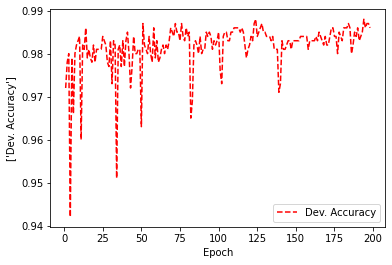

In [18]:
# Call with momentum
for mode in modes:
    fig_name = model_name.format(mode)
    results_without_momentum[mode] = run_training(data_path, 
                                                  epochs, mode, fig_name, h1, 
                                                  lr, batch_size, momentum_param)

In [23]:
# Now use grid search for hyper-parameter optimization
mode = 'mini'
model_name = 'grid_search_result'
epochs = 150

# These are the grids that we will search over
momentum_grid = np.arange(0.1,0.9,0.1)
lr_grid = np.arange(0.01,0.1,0.01)
batch_size_grid = [16,64,256,1024,4096]

We are 0.0 % done!
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  7824.092372340163
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  5539.429270367608
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  3577.6887740151274
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  2614.979947557601
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  2154.256379322022
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
e

loss after epoch:  44 :  1015.7427811176226
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  1007.7481411148685
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1000.7831895601437
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  993.2078408541947
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  987.7639088283784
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  980.1365172668812
epoch : 50  batch: 0
epoch : 

epoch : 89  batch: 4000
epoch : 89  batch: 6000
epoch : 89  batch: 8000
epoch : 89  batch: 10000
loss after epoch:  89 :  785.2103752597872
epoch : 90  batch: 0
epoch : 90  batch: 2000
epoch : 90  batch: 4000
epoch : 90  batch: 6000
epoch : 90  batch: 8000
epoch : 90  batch: 10000
loss after epoch:  90 :  772.8354749648081
epoch : 91  batch: 0
epoch : 91  batch: 2000
epoch : 91  batch: 4000
epoch : 91  batch: 6000
epoch : 91  batch: 8000
epoch : 91  batch: 10000
loss after epoch:  91 :  765.9141836723607
epoch : 92  batch: 0
epoch : 92  batch: 2000
epoch : 92  batch: 4000
epoch : 92  batch: 6000
epoch : 92  batch: 8000
epoch : 92  batch: 10000
loss after epoch:  92 :  761.5590486920541
epoch : 93  batch: 0
epoch : 93  batch: 2000
epoch : 93  batch: 4000
epoch : 93  batch: 6000
epoch : 93  batch: 8000
epoch : 93  batch: 10000
loss after epoch:  93 :  758.2736387582845
epoch : 94  batch: 0
epoch : 94  batch: 2000
epoch : 94  batch: 4000
epoch : 94  batch: 6000
epoch : 94  batch: 8000
epo

epoch : 132  batch: 8000
epoch : 132  batch: 10000
loss after epoch:  132 :  632.3191166800191
epoch : 133  batch: 0
epoch : 133  batch: 2000
epoch : 133  batch: 4000
epoch : 133  batch: 6000
epoch : 133  batch: 8000
epoch : 133  batch: 10000
loss after epoch:  133 :  621.6098859621362
epoch : 134  batch: 0
epoch : 134  batch: 2000
epoch : 134  batch: 4000
epoch : 134  batch: 6000
epoch : 134  batch: 8000
epoch : 134  batch: 10000
loss after epoch:  134 :  618.7854785792883
epoch : 135  batch: 0
epoch : 135  batch: 2000
epoch : 135  batch: 4000
epoch : 135  batch: 6000
epoch : 135  batch: 8000
epoch : 135  batch: 10000
loss after epoch:  135 :  616.7853690412632
epoch : 136  batch: 0
epoch : 136  batch: 2000
epoch : 136  batch: 4000
epoch : 136  batch: 6000
epoch : 136  batch: 8000
epoch : 136  batch: 10000
loss after epoch:  136 :  615.8548556115284
epoch : 137  batch: 0
epoch : 137  batch: 2000
epoch : 137  batch: 4000
epoch : 137  batch: 6000
epoch : 137  batch: 8000
epoch : 137  ba

epoch : 53  batch: 8000
loss after epoch:  53 :  1415.0318209527327
epoch : 54  batch: 0
epoch : 54  batch: 8000
loss after epoch:  54 :  1407.883781488623
epoch : 55  batch: 0
epoch : 55  batch: 8000
loss after epoch:  55 :  1401.4700518127886
epoch : 56  batch: 0
epoch : 56  batch: 8000
loss after epoch:  56 :  1395.2956707596181
epoch : 57  batch: 0
epoch : 57  batch: 8000
loss after epoch:  57 :  1389.4241363626081
epoch : 58  batch: 0
epoch : 58  batch: 8000
loss after epoch:  58 :  1383.889541583283
epoch : 59  batch: 0
epoch : 59  batch: 8000
loss after epoch:  59 :  1377.9698301197213
epoch : 60  batch: 0
epoch : 60  batch: 8000
loss after epoch:  60 :  1372.1951075017905
epoch : 61  batch: 0
epoch : 61  batch: 8000
loss after epoch:  61 :  1370.2055774418393
epoch : 62  batch: 0
epoch : 62  batch: 8000
loss after epoch:  62 :  1360.803441187403
epoch : 63  batch: 0
epoch : 63  batch: 8000
loss after epoch:  63 :  1357.3773941637799
epoch : 64  batch: 0
epoch : 64  batch: 8000


epoch : 145  batch: 8000
loss after epoch:  145 :  1085.2115291533507
epoch : 146  batch: 0
epoch : 146  batch: 8000
loss after epoch:  146 :  1082.8420144694737
epoch : 147  batch: 0
epoch : 147  batch: 8000
loss after epoch:  147 :  1081.9499018341264
epoch : 148  batch: 0
epoch : 148  batch: 8000
loss after epoch:  148 :  1079.6671954367448
epoch : 149  batch: 0
epoch : 149  batch: 8000
loss after epoch:  149 :  1075.8581803015295
best accuracy: 0.9730833333333333
best loss: 1075.8581803015295
best epoch: 149
best dev accuracy: 0.9730833333333333
best dev loss: 1075.8581803015295
best dev epoch: 149
We are 0.0049382716049382715 % done!
epoch : 0  batch: 0
loss after epoch:  0 :  8297.219410658088
epoch : 1  batch: 0
loss after epoch:  1 :  8289.205905585495
epoch : 2  batch: 0
loss after epoch:  2 :  8280.25223601494
epoch : 3  batch: 0
loss after epoch:  3 :  8270.00202336899
epoch : 4  batch: 0
loss after epoch:  4 :  8258.019801951217
epoch : 5  batch: 0
loss after epoch:  5 :  8

loss after epoch:  118 :  1709.490857265171
epoch : 119  batch: 0
loss after epoch:  119 :  1703.245270466538
epoch : 120  batch: 0
loss after epoch:  120 :  1697.2426767850775
epoch : 121  batch: 0
loss after epoch:  121 :  1691.3983000443702
epoch : 122  batch: 0
loss after epoch:  122 :  1685.7863086776213
epoch : 123  batch: 0
loss after epoch:  123 :  1680.2914927499482
epoch : 124  batch: 0
loss after epoch:  124 :  1674.5784075182685
epoch : 125  batch: 0
loss after epoch:  125 :  1669.2341859984374
epoch : 126  batch: 0
loss after epoch:  126 :  1664.0430157801086
epoch : 127  batch: 0
loss after epoch:  127 :  1658.776942319817
epoch : 128  batch: 0
loss after epoch:  128 :  1653.761395267129
epoch : 129  batch: 0
loss after epoch:  129 :  1648.81675067402
epoch : 130  batch: 0
loss after epoch:  130 :  1643.9622465761497
epoch : 131  batch: 0
loss after epoch:  131 :  1639.4204479439009
epoch : 132  batch: 0
loss after epoch:  132 :  1634.5420720386069
epoch : 133  batch: 0
l

loss after epoch:  92 :  6829.800853654634
epoch : 93  batch: 0
loss after epoch:  93 :  6790.112615628415
epoch : 94  batch: 0
loss after epoch:  94 :  6750.264165675333
epoch : 95  batch: 0
loss after epoch:  95 :  6710.166477733602
epoch : 96  batch: 0
loss after epoch:  96 :  6669.9038133396825
epoch : 97  batch: 0
loss after epoch:  97 :  6629.396745379994
epoch : 98  batch: 0
loss after epoch:  98 :  6588.729449136539
epoch : 99  batch: 0
loss after epoch:  99 :  6547.955336671884
epoch : 100  batch: 0
loss after epoch:  100 :  6507.092278885615
epoch : 101  batch: 0
loss after epoch:  101 :  6466.093615338414
epoch : 102  batch: 0
loss after epoch:  102 :  6425.040246859791
epoch : 103  batch: 0
loss after epoch:  103 :  6383.956620110434
epoch : 104  batch: 0
loss after epoch:  104 :  6342.826984536736
epoch : 105  batch: 0
loss after epoch:  105 :  6301.625163984642
epoch : 106  batch: 0
loss after epoch:  106 :  6260.405619096229
epoch : 107  batch: 0
loss after epoch:  107 :

loss after epoch:  67 :  8266.11737257024
epoch : 68  batch: 0
loss after epoch:  68 :  8265.370217434222
epoch : 69  batch: 0
loss after epoch:  69 :  8264.615829857685
epoch : 70  batch: 0
loss after epoch:  70 :  8263.85330235038
epoch : 71  batch: 0
loss after epoch:  71 :  8263.08257298197
epoch : 72  batch: 0
loss after epoch:  72 :  8262.304088734221
epoch : 73  batch: 0
loss after epoch:  73 :  8261.517001187403
epoch : 74  batch: 0
loss after epoch:  74 :  8260.720680387414
epoch : 75  batch: 0
loss after epoch:  75 :  8259.91665174253
epoch : 76  batch: 0
loss after epoch:  76 :  8259.103679998141
epoch : 77  batch: 0
loss after epoch:  77 :  8258.281466475393
epoch : 78  batch: 0
loss after epoch:  78 :  8257.451408091034
epoch : 79  batch: 0
loss after epoch:  79 :  8256.611561334343
epoch : 80  batch: 0
loss after epoch:  80 :  8255.762829428564
epoch : 81  batch: 0
loss after epoch:  81 :  8254.90466780133
epoch : 82  batch: 0
loss after epoch:  82 :  8254.036636203156
ep

epoch : 14  batch: 10000
loss after epoch:  14 :  1153.8921445791123
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1138.5560438802656
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1122.831130199312
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1093.6280314058101
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1078.3989988433595
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1060.5476990601692
ep

epoch : 59  batch: 10000
loss after epoch:  59 :  665.1719237869015
epoch : 60  batch: 0
epoch : 60  batch: 2000
epoch : 60  batch: 4000
epoch : 60  batch: 6000
epoch : 60  batch: 8000
epoch : 60  batch: 10000
loss after epoch:  60 :  659.5862720869005
epoch : 61  batch: 0
epoch : 61  batch: 2000
epoch : 61  batch: 4000
epoch : 61  batch: 6000
epoch : 61  batch: 8000
epoch : 61  batch: 10000
loss after epoch:  61 :  655.518352115133
epoch : 62  batch: 0
epoch : 62  batch: 2000
epoch : 62  batch: 4000
epoch : 62  batch: 6000
epoch : 62  batch: 8000
epoch : 62  batch: 10000
loss after epoch:  62 :  651.5866957912626
epoch : 63  batch: 0
epoch : 63  batch: 2000
epoch : 63  batch: 4000
epoch : 63  batch: 6000
epoch : 63  batch: 8000
epoch : 63  batch: 10000
loss after epoch:  63 :  644.1122400062352
epoch : 64  batch: 0
epoch : 64  batch: 2000
epoch : 64  batch: 4000
epoch : 64  batch: 6000
epoch : 64  batch: 8000
epoch : 64  batch: 10000
loss after epoch:  64 :  636.3186494391723
epoch : 

epoch : 104  batch: 6000
epoch : 104  batch: 8000
epoch : 104  batch: 10000
loss after epoch:  104 :  487.21292070242794
epoch : 105  batch: 0
epoch : 105  batch: 2000
epoch : 105  batch: 4000
epoch : 105  batch: 6000
epoch : 105  batch: 8000
epoch : 105  batch: 10000
loss after epoch:  105 :  478.01255602612343
epoch : 106  batch: 0
epoch : 106  batch: 2000
epoch : 106  batch: 4000
epoch : 106  batch: 6000
epoch : 106  batch: 8000
epoch : 106  batch: 10000
loss after epoch:  106 :  472.85302849040625
epoch : 107  batch: 0
epoch : 107  batch: 2000
epoch : 107  batch: 4000
epoch : 107  batch: 6000
epoch : 107  batch: 8000
epoch : 107  batch: 10000
loss after epoch:  107 :  471.92599801162464
epoch : 108  batch: 0
epoch : 108  batch: 2000
epoch : 108  batch: 4000
epoch : 108  batch: 6000
epoch : 108  batch: 8000
epoch : 108  batch: 10000
loss after epoch:  108 :  470.56144478760075
epoch : 109  batch: 0
epoch : 109  batch: 2000
epoch : 109  batch: 4000
epoch : 109  batch: 6000
epoch : 10

epoch : 147  batch: 2000
epoch : 147  batch: 4000
epoch : 147  batch: 6000
epoch : 147  batch: 8000
epoch : 147  batch: 10000
loss after epoch:  147 :  369.04005869994967
epoch : 148  batch: 0
epoch : 148  batch: 2000
epoch : 148  batch: 4000
epoch : 148  batch: 6000
epoch : 148  batch: 8000
epoch : 148  batch: 10000
loss after epoch:  148 :  365.59034520897853
epoch : 149  batch: 0
epoch : 149  batch: 2000
epoch : 149  batch: 4000
epoch : 149  batch: 6000
epoch : 149  batch: 8000
epoch : 149  batch: 10000
loss after epoch:  149 :  369.8961981209927
best accuracy: 0.99275
best loss: 365.59034520897853
best epoch: 148
best dev accuracy: 0.9920833333333333
best dev loss: 369.9141271805198
best dev epoch: 146
We are 0.014814814814814815 % done!
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  8208.977328096564
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  7812.745908435909
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  6797.674687

epoch : 85  batch: 8000
loss after epoch:  85 :  1029.9499810081409
epoch : 86  batch: 0
epoch : 86  batch: 8000
loss after epoch:  86 :  1025.189628434926
epoch : 87  batch: 0
epoch : 87  batch: 8000
loss after epoch:  87 :  1026.0308680601333
epoch : 88  batch: 0
epoch : 88  batch: 8000
loss after epoch:  88 :  1023.8412852443927
epoch : 89  batch: 0
epoch : 89  batch: 8000
loss after epoch:  89 :  1020.9679874838824
epoch : 90  batch: 0
epoch : 90  batch: 8000
loss after epoch:  90 :  1010.7350660831718
epoch : 91  batch: 0
epoch : 91  batch: 8000
loss after epoch:  91 :  1006.2569100950573
epoch : 92  batch: 0
epoch : 92  batch: 8000
loss after epoch:  92 :  1002.6085811819958
epoch : 93  batch: 0
epoch : 93  batch: 8000
loss after epoch:  93 :  999.1800659258264
epoch : 94  batch: 0
epoch : 94  batch: 8000
loss after epoch:  94 :  1001.3249689854566
epoch : 95  batch: 0
epoch : 95  batch: 8000
loss after epoch:  95 :  993.2011995272923
epoch : 96  batch: 0
epoch : 96  batch: 8000


loss after epoch:  35 :  2334.291743989932
epoch : 36  batch: 0
loss after epoch:  36 :  2281.60669080877
epoch : 37  batch: 0
loss after epoch:  37 :  2232.4333014095123
epoch : 38  batch: 0
loss after epoch:  38 :  2187.7534671428907
epoch : 39  batch: 0
loss after epoch:  39 :  2146.196064810458
epoch : 40  batch: 0
loss after epoch:  40 :  2107.982077053539
epoch : 41  batch: 0
loss after epoch:  41 :  2073.225290975384
epoch : 42  batch: 0
loss after epoch:  42 :  2039.1792497538377
epoch : 43  batch: 0
loss after epoch:  43 :  2009.6460684064814
epoch : 44  batch: 0
loss after epoch:  44 :  1980.5392759282888
epoch : 45  batch: 0
loss after epoch:  45 :  1952.6098951142114
epoch : 46  batch: 0
loss after epoch:  46 :  1927.4315761100104
epoch : 47  batch: 0
loss after epoch:  47 :  1903.7425748407413
epoch : 48  batch: 0
loss after epoch:  48 :  1881.609286558038
epoch : 49  batch: 0
loss after epoch:  49 :  1860.5218749477808
epoch : 50  batch: 0
loss after epoch:  50 :  1841.47

epoch : 10  batch: 0
loss after epoch:  10 :  8249.605064330659
epoch : 11  batch: 0
loss after epoch:  11 :  8241.903289938975
epoch : 12  batch: 0
loss after epoch:  12 :  8233.478947035997
epoch : 13  batch: 0
loss after epoch:  13 :  8224.236344826786
epoch : 14  batch: 0
loss after epoch:  14 :  8214.081481203537
epoch : 15  batch: 0
loss after epoch:  15 :  8202.92586034355
epoch : 16  batch: 0
loss after epoch:  16 :  8190.656765378716
epoch : 17  batch: 0
loss after epoch:  17 :  8177.151687931878
epoch : 18  batch: 0
loss after epoch:  18 :  8162.292901273706
epoch : 19  batch: 0
loss after epoch:  19 :  8145.926411277142
epoch : 20  batch: 0
loss after epoch:  20 :  8127.904599270358
epoch : 21  batch: 0
loss after epoch:  21 :  8108.096502048675
epoch : 22  batch: 0
loss after epoch:  22 :  8086.340655304196
epoch : 23  batch: 0
loss after epoch:  23 :  8062.449077323741
epoch : 24  batch: 0
loss after epoch:  24 :  8036.3391715515345
epoch : 25  batch: 0
loss after epoch:  

loss after epoch:  137 :  2377.251878926732
epoch : 138  batch: 0
loss after epoch:  138 :  2362.386372285018
epoch : 139  batch: 0
loss after epoch:  139 :  2347.8274292196566
epoch : 140  batch: 0
loss after epoch:  140 :  2333.5795636841212
epoch : 141  batch: 0
loss after epoch:  141 :  2319.719220468757
epoch : 142  batch: 0
loss after epoch:  142 :  2306.0569508990075
epoch : 143  batch: 0
loss after epoch:  143 :  2292.716335547609
epoch : 144  batch: 0
loss after epoch:  144 :  2279.7109926687485
epoch : 145  batch: 0
loss after epoch:  145 :  2266.9360230396414
epoch : 146  batch: 0
loss after epoch:  146 :  2254.455198355562
epoch : 147  batch: 0
loss after epoch:  147 :  2242.214999525413
epoch : 148  batch: 0
loss after epoch:  148 :  2230.2787877640935
epoch : 149  batch: 0
loss after epoch:  149 :  2218.4774607186923
best accuracy: 0.9543333333333334
best loss: 2218.4774607186923
best epoch: 149
best dev accuracy: 0.9543333333333334
best dev loss: 2218.4774607186923
best 

loss after epoch:  112 :  7934.102878798568
epoch : 113  batch: 0
loss after epoch:  113 :  7925.055702332929
epoch : 114  batch: 0
loss after epoch:  114 :  7915.830526865195
epoch : 115  batch: 0
loss after epoch:  115 :  7906.425589653417
epoch : 116  batch: 0
loss after epoch:  116 :  7896.842145124784
epoch : 117  batch: 0
loss after epoch:  117 :  7887.077759173607
epoch : 118  batch: 0
loss after epoch:  118 :  7877.132820431001
epoch : 119  batch: 0
loss after epoch:  119 :  7867.012011605324
epoch : 120  batch: 0
loss after epoch:  120 :  7856.7107005118705
epoch : 121  batch: 0
loss after epoch:  121 :  7846.221482905414
epoch : 122  batch: 0
loss after epoch:  122 :  7835.548277461362
epoch : 123  batch: 0
loss after epoch:  123 :  7824.694516464373
epoch : 124  batch: 0
loss after epoch:  124 :  7813.655573441659
epoch : 125  batch: 0
loss after epoch:  125 :  7802.429639447831
epoch : 126  batch: 0
loss after epoch:  126 :  7791.021695735651
epoch : 127  batch: 0
loss afte

epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  769.8169209519086
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  758.6932916128903
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  742.7368738119364
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  739.7282957414553
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  722.0255717505582
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epo

epoch : 75  batch: 4000
epoch : 75  batch: 6000
epoch : 75  batch: 8000
epoch : 75  batch: 10000
loss after epoch:  75 :  425.87650551395467
epoch : 76  batch: 0
epoch : 76  batch: 2000
epoch : 76  batch: 4000
epoch : 76  batch: 6000
epoch : 76  batch: 8000
epoch : 76  batch: 10000
loss after epoch:  76 :  420.1226988983914
epoch : 77  batch: 0
epoch : 77  batch: 2000
epoch : 77  batch: 4000
epoch : 77  batch: 6000
epoch : 77  batch: 8000
epoch : 77  batch: 10000
loss after epoch:  77 :  418.9706002864174
epoch : 78  batch: 0
epoch : 78  batch: 2000
epoch : 78  batch: 4000
epoch : 78  batch: 6000
epoch : 78  batch: 8000
epoch : 78  batch: 10000
loss after epoch:  78 :  410.65175560929674
epoch : 79  batch: 0
epoch : 79  batch: 2000
epoch : 79  batch: 4000
epoch : 79  batch: 6000
epoch : 79  batch: 8000
epoch : 79  batch: 10000
loss after epoch:  79 :  407.48169542656314
epoch : 80  batch: 0
epoch : 80  batch: 2000
epoch : 80  batch: 4000
epoch : 80  batch: 6000
epoch : 80  batch: 8000


epoch : 119  batch: 4000
epoch : 119  batch: 6000
epoch : 119  batch: 8000
epoch : 119  batch: 10000
loss after epoch:  119 :  270.61562412688454
epoch : 120  batch: 0
epoch : 120  batch: 2000
epoch : 120  batch: 4000
epoch : 120  batch: 6000
epoch : 120  batch: 8000
epoch : 120  batch: 10000
loss after epoch:  120 :  272.1426595631067
epoch : 121  batch: 0
epoch : 121  batch: 2000
epoch : 121  batch: 4000
epoch : 121  batch: 6000
epoch : 121  batch: 8000
epoch : 121  batch: 10000
loss after epoch:  121 :  266.72282781953857
epoch : 122  batch: 0
epoch : 122  batch: 2000
epoch : 122  batch: 4000
epoch : 122  batch: 6000
epoch : 122  batch: 8000
epoch : 122  batch: 10000
loss after epoch:  122 :  273.0590632303298
epoch : 123  batch: 0
epoch : 123  batch: 2000
epoch : 123  batch: 4000
epoch : 123  batch: 6000
epoch : 123  batch: 8000
epoch : 123  batch: 10000
loss after epoch:  123 :  262.6121689855303
epoch : 124  batch: 0
epoch : 124  batch: 2000
epoch : 124  batch: 4000
epoch : 124  

epoch : 25  batch: 8000
loss after epoch:  25 :  1293.0800678563032
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1279.4926156918154
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1274.0002655726985
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1271.9977597564348
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1251.52246982729
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1236.1986235211562
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1231.638427867589
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1216.3139797600306
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1207.934566930991
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1198.31278851474
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1189.1235185695957
epoch : 36  batch: 0
epoch : 36  batch: 8000
los

loss after epoch:  118 :  792.7687015560631
epoch : 119  batch: 0
epoch : 119  batch: 8000
loss after epoch:  119 :  774.5941109968091
epoch : 120  batch: 0
epoch : 120  batch: 8000
loss after epoch:  120 :  771.1034198334479
epoch : 121  batch: 0
epoch : 121  batch: 8000
loss after epoch:  121 :  766.4314087069098
epoch : 122  batch: 0
epoch : 122  batch: 8000
loss after epoch:  122 :  770.0177139245595
epoch : 123  batch: 0
epoch : 123  batch: 8000
loss after epoch:  123 :  760.8995325702679
epoch : 124  batch: 0
epoch : 124  batch: 8000
loss after epoch:  124 :  757.6181618499825
epoch : 125  batch: 0
epoch : 125  batch: 8000
loss after epoch:  125 :  753.9482207411861
epoch : 126  batch: 0
epoch : 126  batch: 8000
loss after epoch:  126 :  753.1055637133783
epoch : 127  batch: 0
epoch : 127  batch: 8000
loss after epoch:  127 :  748.7522757538812
epoch : 128  batch: 0
epoch : 128  batch: 8000
loss after epoch:  128 :  746.9239154473789
epoch : 129  batch: 0
epoch : 129  batch: 8000

loss after epoch:  81 :  1369.7725416544527
epoch : 82  batch: 0
loss after epoch:  82 :  1366.3166609511372
epoch : 83  batch: 0
loss after epoch:  83 :  1361.4513680740297
epoch : 84  batch: 0
loss after epoch:  84 :  1357.0550976892246
epoch : 85  batch: 0
loss after epoch:  85 :  1353.467166305093
epoch : 86  batch: 0
loss after epoch:  86 :  1349.0486569155005
epoch : 87  batch: 0
loss after epoch:  87 :  1348.2784632621356
epoch : 88  batch: 0
loss after epoch:  88 :  1343.2883663767107
epoch : 89  batch: 0
loss after epoch:  89 :  1340.2532731521392
epoch : 90  batch: 0
loss after epoch:  90 :  1334.0726279324085
epoch : 91  batch: 0
loss after epoch:  91 :  1330.5380477915996
epoch : 92  batch: 0
loss after epoch:  92 :  1326.9647378244038
epoch : 93  batch: 0
loss after epoch:  93 :  1323.6783420824513
epoch : 94  batch: 0
loss after epoch:  94 :  1320.3235829142654
epoch : 95  batch: 0
loss after epoch:  95 :  1316.6515339988791
epoch : 96  batch: 0
loss after epoch:  96 :  1

loss after epoch:  54 :  4151.629273458742
epoch : 55  batch: 0
loss after epoch:  55 :  4065.8056538563424
epoch : 56  batch: 0
loss after epoch:  56 :  3982.6173669637064
epoch : 57  batch: 0
loss after epoch:  57 :  3902.2682307282375
epoch : 58  batch: 0
loss after epoch:  58 :  3824.681674557448
epoch : 59  batch: 0
loss after epoch:  59 :  3749.6605026203424
epoch : 60  batch: 0
loss after epoch:  60 :  3677.3157899770777
epoch : 61  batch: 0
loss after epoch:  61 :  3607.6413597028245
epoch : 62  batch: 0
loss after epoch:  62 :  3540.3547188739885
epoch : 63  batch: 0
loss after epoch:  63 :  3475.542606136031
epoch : 64  batch: 0
loss after epoch:  64 :  3413.0503238536076
epoch : 65  batch: 0
loss after epoch:  65 :  3352.9107824486264
epoch : 66  batch: 0
loss after epoch:  66 :  3295.140911372636
epoch : 67  batch: 0
loss after epoch:  67 :  3239.363398076095
epoch : 68  batch: 0
loss after epoch:  68 :  3185.795480190638
epoch : 69  batch: 0
loss after epoch:  69 :  3134.2

loss after epoch:  28 :  8250.624363766063
epoch : 29  batch: 0
loss after epoch:  29 :  8247.855189397778
epoch : 30  batch: 0
loss after epoch:  30 :  8244.992083832625
epoch : 31  batch: 0
loss after epoch:  31 :  8242.029548456878
epoch : 32  batch: 0
loss after epoch:  32 :  8238.964971173751
epoch : 33  batch: 0
loss after epoch:  33 :  8235.792321650384
epoch : 34  batch: 0
loss after epoch:  34 :  8232.509860214712
epoch : 35  batch: 0
loss after epoch:  35 :  8229.111328837635
epoch : 36  batch: 0
loss after epoch:  36 :  8225.591784786475
epoch : 37  batch: 0
loss after epoch:  37 :  8221.950285352345
epoch : 38  batch: 0
loss after epoch:  38 :  8218.17615599264
epoch : 39  batch: 0
loss after epoch:  39 :  8214.26762926405
epoch : 40  batch: 0
loss after epoch:  40 :  8210.218226409233
epoch : 41  batch: 0
loss after epoch:  41 :  8206.022779277617
epoch : 42  batch: 0
loss after epoch:  42 :  8201.676265290584
epoch : 43  batch: 0
loss after epoch:  43 :  8197.17032758523


loss after epoch:  0 :  2740.7480638295124
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1670.6378804699098
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1469.8130864950776
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1492.9375819067795
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1299.6515787849823
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1233.2549717861239
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4

epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  500.09326878351965
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  486.7648383633956
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  498.8227694543292
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  480.27136019285325
epoch : 50  batch: 0
epoch : 50  batch: 2000
epoch : 50  batch: 4000
epoch : 50  batch: 6000
epoch : 50  batch: 8000
epoch : 50  batch: 10000
loss after epoch:  50 :  474.26185442521364
epoch : 51  batch: 0
epoch : 51  batch: 2000
epoch : 51  batch: 4000
epoch : 51  batch: 6000


epoch : 90  batch: 8000
epoch : 90  batch: 10000
loss after epoch:  90 :  275.82144367692905
epoch : 91  batch: 0
epoch : 91  batch: 2000
epoch : 91  batch: 4000
epoch : 91  batch: 6000
epoch : 91  batch: 8000
epoch : 91  batch: 10000
loss after epoch:  91 :  267.5983830853552
epoch : 92  batch: 0
epoch : 92  batch: 2000
epoch : 92  batch: 4000
epoch : 92  batch: 6000
epoch : 92  batch: 8000
epoch : 92  batch: 10000
loss after epoch:  92 :  268.73078599086944
epoch : 93  batch: 0
epoch : 93  batch: 2000
epoch : 93  batch: 4000
epoch : 93  batch: 6000
epoch : 93  batch: 8000
epoch : 93  batch: 10000
loss after epoch:  93 :  261.34190840240205
epoch : 94  batch: 0
epoch : 94  batch: 2000
epoch : 94  batch: 4000
epoch : 94  batch: 6000
epoch : 94  batch: 8000
epoch : 94  batch: 10000
loss after epoch:  94 :  261.3542678168203
epoch : 95  batch: 0
epoch : 95  batch: 2000
epoch : 95  batch: 4000
epoch : 95  batch: 6000
epoch : 95  batch: 8000
epoch : 95  batch: 10000
loss after epoch:  95 :

epoch : 133  batch: 6000
epoch : 133  batch: 8000
epoch : 133  batch: 10000
loss after epoch:  133 :  170.4362912848198
epoch : 134  batch: 0
epoch : 134  batch: 2000
epoch : 134  batch: 4000
epoch : 134  batch: 6000
epoch : 134  batch: 8000
epoch : 134  batch: 10000
loss after epoch:  134 :  168.70633826434573
epoch : 135  batch: 0
epoch : 135  batch: 2000
epoch : 135  batch: 4000
epoch : 135  batch: 6000
epoch : 135  batch: 8000
epoch : 135  batch: 10000
loss after epoch:  135 :  166.5495427142897
epoch : 136  batch: 0
epoch : 136  batch: 2000
epoch : 136  batch: 4000
epoch : 136  batch: 6000
epoch : 136  batch: 8000
epoch : 136  batch: 10000
loss after epoch:  136 :  176.52019602875438
epoch : 137  batch: 0
epoch : 137  batch: 2000
epoch : 137  batch: 4000
epoch : 137  batch: 6000
epoch : 137  batch: 8000
epoch : 137  batch: 10000
loss after epoch:  137 :  167.27523280139204
epoch : 138  batch: 0
epoch : 138  batch: 2000
epoch : 138  batch: 4000
epoch : 138  batch: 6000
epoch : 138 

epoch : 56  batch: 0
epoch : 56  batch: 8000
loss after epoch:  56 :  935.0253934908189
epoch : 57  batch: 0
epoch : 57  batch: 8000
loss after epoch:  57 :  930.1914057494505
epoch : 58  batch: 0
epoch : 58  batch: 8000
loss after epoch:  58 :  923.474389362349
epoch : 59  batch: 0
epoch : 59  batch: 8000
loss after epoch:  59 :  917.0123961180227
epoch : 60  batch: 0
epoch : 60  batch: 8000
loss after epoch:  60 :  913.2330397266687
epoch : 61  batch: 0
epoch : 61  batch: 8000
loss after epoch:  61 :  910.8028073086186
epoch : 62  batch: 0
epoch : 62  batch: 8000
loss after epoch:  62 :  902.3236430338831
epoch : 63  batch: 0
epoch : 63  batch: 8000
loss after epoch:  63 :  895.796934682012
epoch : 64  batch: 0
epoch : 64  batch: 8000
loss after epoch:  64 :  889.8622760825833
epoch : 65  batch: 0
epoch : 65  batch: 8000
loss after epoch:  65 :  887.1788973881928
epoch : 66  batch: 0
epoch : 66  batch: 8000
loss after epoch:  66 :  884.198521736979
epoch : 67  batch: 0
epoch : 67  ba

epoch : 148  batch: 8000
loss after epoch:  148 :  585.6049620560657
epoch : 149  batch: 0
epoch : 149  batch: 8000
loss after epoch:  149 :  584.08054120529
best accuracy: 0.9856666666666667
best loss: 584.08054120529
best epoch: 149
best dev accuracy: 0.9855833333333334
best dev loss: 587.8293505183425
best dev epoch: 146
We are 0.04197530864197531 % done!
epoch : 0  batch: 0
loss after epoch:  0 :  8270.539143572842
epoch : 1  batch: 0
loss after epoch:  1 :  8207.693405914357
epoch : 2  batch: 0
loss after epoch:  2 :  8076.374125471479
epoch : 3  batch: 0
loss after epoch:  3 :  7813.573821185891
epoch : 4  batch: 0
loss after epoch:  4 :  7377.557916163917
epoch : 5  batch: 0
loss after epoch:  5 :  6800.707976740858
epoch : 6  batch: 0
loss after epoch:  6 :  6162.772507543085
epoch : 7  batch: 0
loss after epoch:  7 :  5528.89647468946
epoch : 8  batch: 0
loss after epoch:  8 :  4938.3096521230145
epoch : 9  batch: 0
loss after epoch:  9 :  4408.075609226197
epoch : 10  batch: 

loss after epoch:  121 :  1147.3014498302703
epoch : 122  batch: 0
loss after epoch:  122 :  1146.3049899670193
epoch : 123  batch: 0
loss after epoch:  123 :  1144.2173658588154
epoch : 124  batch: 0
loss after epoch:  124 :  1139.3345845493468
epoch : 125  batch: 0
loss after epoch:  125 :  1136.8663043651002
epoch : 126  batch: 0
loss after epoch:  126 :  1134.8067679203987
epoch : 127  batch: 0
loss after epoch:  127 :  1130.8757940897951
epoch : 128  batch: 0
loss after epoch:  128 :  1129.7006416695367
epoch : 129  batch: 0
loss after epoch:  129 :  1127.9431731815475
epoch : 130  batch: 0
loss after epoch:  130 :  1122.8750820378075
epoch : 131  batch: 0
loss after epoch:  131 :  1125.3159127837866
epoch : 132  batch: 0
loss after epoch:  132 :  1117.74761238789
epoch : 133  batch: 0
loss after epoch:  133 :  1115.128941859893
epoch : 134  batch: 0
loss after epoch:  134 :  1112.6262739995605
epoch : 135  batch: 0
loss after epoch:  135 :  1110.3033115300823
epoch : 136  batch: 

loss after epoch:  96 :  1870.5000411102212
epoch : 97  batch: 0
loss after epoch:  97 :  1860.0336475445604
epoch : 98  batch: 0
loss after epoch:  98 :  1849.7533164127817
epoch : 99  batch: 0
loss after epoch:  99 :  1839.8195813785387
epoch : 100  batch: 0
loss after epoch:  100 :  1830.5811793859557
epoch : 101  batch: 0
loss after epoch:  101 :  1821.0055684175081
epoch : 102  batch: 0
loss after epoch:  102 :  1811.9785941999455
epoch : 103  batch: 0
loss after epoch:  103 :  1802.9007114715996
epoch : 104  batch: 0
loss after epoch:  104 :  1794.281367862789
epoch : 105  batch: 0
loss after epoch:  105 :  1786.108083959021
epoch : 106  batch: 0
loss after epoch:  106 :  1777.7756977392207
epoch : 107  batch: 0
loss after epoch:  107 :  1769.771454055457
epoch : 108  batch: 0
loss after epoch:  108 :  1762.0527405220575
epoch : 109  batch: 0
loss after epoch:  109 :  1754.4803675305875
epoch : 110  batch: 0
loss after epoch:  110 :  1747.1711802017483
epoch : 111  batch: 0
loss 

epoch : 70  batch: 0
loss after epoch:  70 :  7602.014637879534
epoch : 71  batch: 0
loss after epoch:  71 :  7573.356833338279
epoch : 72  batch: 0
loss after epoch:  72 :  7544.019617815332
epoch : 73  batch: 0
loss after epoch:  73 :  7514.0107770410095
epoch : 74  batch: 0
loss after epoch:  74 :  7483.338970581422
epoch : 75  batch: 0
loss after epoch:  75 :  7452.027557728872
epoch : 76  batch: 0
loss after epoch:  76 :  7420.069877525715
epoch : 77  batch: 0
loss after epoch:  77 :  7387.495444621027
epoch : 78  batch: 0
loss after epoch:  78 :  7354.3447655310265
epoch : 79  batch: 0
loss after epoch:  79 :  7320.61463028609
epoch : 80  batch: 0
loss after epoch:  80 :  7286.324344002
epoch : 81  batch: 0
loss after epoch:  81 :  7251.506039656344
epoch : 82  batch: 0
loss after epoch:  82 :  7216.1522314430085
epoch : 83  batch: 0
loss after epoch:  83 :  7180.330991321593
epoch : 84  batch: 0
loss after epoch:  84 :  7144.017913858387
epoch : 85  batch: 0
loss after epoch:  8

epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  840.266912289583
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  821.6642463772027
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  795.1225379083057
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  788.4752362967121
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  758.7434430167764
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
los

epoch : 60  batch: 2000
epoch : 60  batch: 4000
epoch : 60  batch: 6000
epoch : 60  batch: 8000
epoch : 60  batch: 10000
loss after epoch:  60 :  335.3081611138223
epoch : 61  batch: 0
epoch : 61  batch: 2000
epoch : 61  batch: 4000
epoch : 61  batch: 6000
epoch : 61  batch: 8000
epoch : 61  batch: 10000
loss after epoch:  61 :  324.4758710381886
epoch : 62  batch: 0
epoch : 62  batch: 2000
epoch : 62  batch: 4000
epoch : 62  batch: 6000
epoch : 62  batch: 8000
epoch : 62  batch: 10000
loss after epoch:  62 :  323.30552151839777
epoch : 63  batch: 0
epoch : 63  batch: 2000
epoch : 63  batch: 4000
epoch : 63  batch: 6000
epoch : 63  batch: 8000
epoch : 63  batch: 10000
loss after epoch:  63 :  319.5169055791852
epoch : 64  batch: 0
epoch : 64  batch: 2000
epoch : 64  batch: 4000
epoch : 64  batch: 6000
epoch : 64  batch: 8000
epoch : 64  batch: 10000
loss after epoch:  64 :  314.62887935043636
epoch : 65  batch: 0
epoch : 65  batch: 2000
epoch : 65  batch: 4000
epoch : 65  batch: 6000
e

epoch : 104  batch: 6000
epoch : 104  batch: 8000
epoch : 104  batch: 10000
loss after epoch:  104 :  184.28028780630154
epoch : 105  batch: 0
epoch : 105  batch: 2000
epoch : 105  batch: 4000
epoch : 105  batch: 6000
epoch : 105  batch: 8000
epoch : 105  batch: 10000
loss after epoch:  105 :  176.8480035689288
epoch : 106  batch: 0
epoch : 106  batch: 2000
epoch : 106  batch: 4000
epoch : 106  batch: 6000
epoch : 106  batch: 8000
epoch : 106  batch: 10000
loss after epoch:  106 :  174.61467991073096
epoch : 107  batch: 0
epoch : 107  batch: 2000
epoch : 107  batch: 4000
epoch : 107  batch: 6000
epoch : 107  batch: 8000
epoch : 107  batch: 10000
loss after epoch:  107 :  171.91176045957428
epoch : 108  batch: 0
epoch : 108  batch: 2000
epoch : 108  batch: 4000
epoch : 108  batch: 6000
epoch : 108  batch: 8000
epoch : 108  batch: 10000
loss after epoch:  108 :  172.68459330935008
epoch : 109  batch: 0
epoch : 109  batch: 2000
epoch : 109  batch: 4000
epoch : 109  batch: 6000
epoch : 109

epoch : 147  batch: 2000
epoch : 147  batch: 4000
epoch : 147  batch: 6000
epoch : 147  batch: 8000
epoch : 147  batch: 10000
loss after epoch:  147 :  116.19133400582587
epoch : 148  batch: 0
epoch : 148  batch: 2000
epoch : 148  batch: 4000
epoch : 148  batch: 6000
epoch : 148  batch: 8000
epoch : 148  batch: 10000
loss after epoch:  148 :  110.20421154671348
epoch : 149  batch: 0
epoch : 149  batch: 2000
epoch : 149  batch: 4000
epoch : 149  batch: 6000
epoch : 149  batch: 8000
epoch : 149  batch: 10000
loss after epoch:  149 :  111.66293743243284
best accuracy: 0.9985833333333334
best loss: 110.20421154671348
best epoch: 148
best dev accuracy: 0.9964166666666666
best dev loss: 205.5605222284667
best dev epoch: 94
We are 0.05185185185185185 % done!
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  7405.633787659637
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  4425.632807804896
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  2

epoch : 86  batch: 0
epoch : 86  batch: 8000
loss after epoch:  86 :  699.5905095265118
epoch : 87  batch: 0
epoch : 87  batch: 8000
loss after epoch:  87 :  696.7512888520057
epoch : 88  batch: 0
epoch : 88  batch: 8000
loss after epoch:  88 :  697.8090550854126
epoch : 89  batch: 0
epoch : 89  batch: 8000
loss after epoch:  89 :  701.064395076502
epoch : 90  batch: 0
epoch : 90  batch: 8000
loss after epoch:  90 :  688.7022294358362
epoch : 91  batch: 0
epoch : 91  batch: 8000
loss after epoch:  91 :  679.0836396961423
epoch : 92  batch: 0
epoch : 92  batch: 8000
loss after epoch:  92 :  674.4215686673832
epoch : 93  batch: 0
epoch : 93  batch: 8000
loss after epoch:  93 :  670.5889881076438
epoch : 94  batch: 0
epoch : 94  batch: 8000
loss after epoch:  94 :  673.2360778112063
epoch : 95  batch: 0
epoch : 95  batch: 8000
loss after epoch:  95 :  665.2456214914114
epoch : 96  batch: 0
epoch : 96  batch: 8000
loss after epoch:  96 :  658.3619276168711
epoch : 97  batch: 0
epoch : 97  

loss after epoch:  35 :  1485.0012291508604
epoch : 36  batch: 0
loss after epoch:  36 :  1473.554821841762
epoch : 37  batch: 0
loss after epoch:  37 :  1462.3403742637206
epoch : 38  batch: 0
loss after epoch:  38 :  1453.5061909236133
epoch : 39  batch: 0
loss after epoch:  39 :  1442.9362318032477
epoch : 40  batch: 0
loss after epoch:  40 :  1434.6852593153963
epoch : 41  batch: 0
loss after epoch:  41 :  1427.490171312093
epoch : 42  batch: 0
loss after epoch:  42 :  1416.246398659203
epoch : 43  batch: 0
loss after epoch:  43 :  1412.1348619829382
epoch : 44  batch: 0
loss after epoch:  44 :  1402.1517086813615
epoch : 45  batch: 0
loss after epoch:  45 :  1392.3680997584229
epoch : 46  batch: 0
loss after epoch:  46 :  1384.8358047950564
epoch : 47  batch: 0
loss after epoch:  47 :  1377.6081864690805
epoch : 48  batch: 0
loss after epoch:  48 :  1370.618927414592
epoch : 49  batch: 0
loss after epoch:  49 :  1363.7092250662915
epoch : 50  batch: 0
loss after epoch:  50 :  1359

loss after epoch:  9 :  8038.711382429685
epoch : 10  batch: 0
loss after epoch:  10 :  7963.221259910357
epoch : 11  batch: 0
loss after epoch:  11 :  7870.830974432549
epoch : 12  batch: 0
loss after epoch:  12 :  7760.640494875786
epoch : 13  batch: 0
loss after epoch:  13 :  7632.116307479442
epoch : 14  batch: 0
loss after epoch:  14 :  7485.802503939481
epoch : 15  batch: 0
loss after epoch:  15 :  7323.540890841949
epoch : 16  batch: 0
loss after epoch:  16 :  7147.36319928946
epoch : 17  batch: 0
loss after epoch:  17 :  6959.769613485645
epoch : 18  batch: 0
loss after epoch:  18 :  6763.773326196166
epoch : 19  batch: 0
loss after epoch:  19 :  6562.272665495453
epoch : 20  batch: 0
loss after epoch:  20 :  6357.093376272584
epoch : 21  batch: 0
loss after epoch:  21 :  6151.275390472803
epoch : 22  batch: 0
loss after epoch:  22 :  5946.465717223728
epoch : 23  batch: 0
loss after epoch:  23 :  5743.712248212012
epoch : 24  batch: 0
loss after epoch:  24 :  5544.807071135922

loss after epoch:  135 :  1499.08351483846
epoch : 136  batch: 0
loss after epoch:  136 :  1496.3760594425378
epoch : 137  batch: 0
loss after epoch:  137 :  1493.093851363659
epoch : 138  batch: 0
loss after epoch:  138 :  1489.9273536720061
epoch : 139  batch: 0
loss after epoch:  139 :  1486.933580466708
epoch : 140  batch: 0
loss after epoch:  140 :  1484.145377830871
epoch : 141  batch: 0
loss after epoch:  141 :  1482.2735944800247
epoch : 142  batch: 0
loss after epoch:  142 :  1478.2552503525048
epoch : 143  batch: 0
loss after epoch:  143 :  1475.4176039445028
epoch : 144  batch: 0
loss after epoch:  144 :  1472.6603497250126
epoch : 145  batch: 0
loss after epoch:  145 :  1469.9419197196758
epoch : 146  batch: 0
loss after epoch:  146 :  1467.2124970533384
epoch : 147  batch: 0
loss after epoch:  147 :  1464.6469744005885
epoch : 148  batch: 0
loss after epoch:  148 :  1462.322744736878
epoch : 149  batch: 0
loss after epoch:  149 :  1459.3075835810027
best accuracy: 0.964083

epoch : 110  batch: 0
loss after epoch:  110 :  5021.203459551358
epoch : 111  batch: 0
loss after epoch:  111 :  4975.758053849069
epoch : 112  batch: 0
loss after epoch:  112 :  4930.701883293765
epoch : 113  batch: 0
loss after epoch:  113 :  4886.050527500913
epoch : 114  batch: 0
loss after epoch:  114 :  4841.81558292329
epoch : 115  batch: 0
loss after epoch:  115 :  4797.958210547194
epoch : 116  batch: 0
loss after epoch:  116 :  4754.502367573187
epoch : 117  batch: 0
loss after epoch:  117 :  4711.474559162872
epoch : 118  batch: 0
loss after epoch:  118 :  4668.873526994205
epoch : 119  batch: 0
loss after epoch:  119 :  4626.706598138477
epoch : 120  batch: 0
loss after epoch:  120 :  4584.989023866852
epoch : 121  batch: 0
loss after epoch:  121 :  4543.718698131934
epoch : 122  batch: 0
loss after epoch:  122 :  4502.90213884436
epoch : 123  batch: 0
loss after epoch:  123 :  4462.588302064504
epoch : 124  batch: 0
loss after epoch:  124 :  4422.686812201886
epoch : 125 

epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  540.8985733340728
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  518.7980767085356
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  511.0686576095389
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  489.75276792828834
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  486.63581956824453
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000


epoch : 73  batch: 10000
loss after epoch:  73 :  227.42945558873873
epoch : 74  batch: 0
epoch : 74  batch: 2000
epoch : 74  batch: 4000
epoch : 74  batch: 6000
epoch : 74  batch: 8000
epoch : 74  batch: 10000
loss after epoch:  74 :  259.0122295296253
epoch : 75  batch: 0
epoch : 75  batch: 2000
epoch : 75  batch: 4000
epoch : 75  batch: 6000
epoch : 75  batch: 8000
epoch : 75  batch: 10000
loss after epoch:  75 :  222.967932876135
epoch : 76  batch: 0
epoch : 76  batch: 2000
epoch : 76  batch: 4000
epoch : 76  batch: 6000
epoch : 76  batch: 8000
epoch : 76  batch: 10000
loss after epoch:  76 :  218.13762814382758
epoch : 77  batch: 0
epoch : 77  batch: 2000
epoch : 77  batch: 4000
epoch : 77  batch: 6000
epoch : 77  batch: 8000
epoch : 77  batch: 10000
loss after epoch:  77 :  219.09686495081488
epoch : 78  batch: 0
epoch : 78  batch: 2000
epoch : 78  batch: 4000
epoch : 78  batch: 6000
epoch : 78  batch: 8000
epoch : 78  batch: 10000
loss after epoch:  78 :  212.36015780062579
epoc

epoch : 117  batch: 4000
epoch : 117  batch: 6000
epoch : 117  batch: 8000
epoch : 117  batch: 10000
loss after epoch:  117 :  125.0497811439954
epoch : 118  batch: 0
epoch : 118  batch: 2000
epoch : 118  batch: 4000
epoch : 118  batch: 6000
epoch : 118  batch: 8000
epoch : 118  batch: 10000
loss after epoch:  118 :  132.78335997615483
epoch : 119  batch: 0
epoch : 119  batch: 2000
epoch : 119  batch: 4000
epoch : 119  batch: 6000
epoch : 119  batch: 8000
epoch : 119  batch: 10000
loss after epoch:  119 :  120.01498078967725
epoch : 120  batch: 0
epoch : 120  batch: 2000
epoch : 120  batch: 4000
epoch : 120  batch: 6000
epoch : 120  batch: 8000
epoch : 120  batch: 10000
loss after epoch:  120 :  119.22678325191877
epoch : 121  batch: 0
epoch : 121  batch: 2000
epoch : 121  batch: 4000
epoch : 121  batch: 6000
epoch : 121  batch: 8000
epoch : 121  batch: 10000
loss after epoch:  121 :  116.66983814938312
epoch : 122  batch: 0
epoch : 122  batch: 2000
epoch : 122  batch: 4000
epoch : 122

loss after epoch:  20 :  1138.446098028291
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1121.5685304929868
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1105.692056510279
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1106.3031568888036
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1078.136568956299
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1063.5444141923467
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1051.6186458970742
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1043.903901107054
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1052.6745444356056
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1023.796092338167
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1004.3749250852678
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  9

epoch : 114  batch: 8000
loss after epoch:  114 :  537.2602317818382
epoch : 115  batch: 0
epoch : 115  batch: 8000
loss after epoch:  115 :  537.4832451603899
epoch : 116  batch: 0
epoch : 116  batch: 8000
loss after epoch:  116 :  531.316366122109
epoch : 117  batch: 0
epoch : 117  batch: 8000
loss after epoch:  117 :  532.2996132215483
epoch : 118  batch: 0
epoch : 118  batch: 8000
loss after epoch:  118 :  556.7069418319848
epoch : 119  batch: 0
epoch : 119  batch: 8000
loss after epoch:  119 :  524.5004587500464
epoch : 120  batch: 0
epoch : 120  batch: 8000
loss after epoch:  120 :  520.8040104495849
epoch : 121  batch: 0
epoch : 121  batch: 8000
loss after epoch:  121 :  517.974184791897
epoch : 122  batch: 0
epoch : 122  batch: 8000
loss after epoch:  122 :  527.9922469348762
epoch : 123  batch: 0
epoch : 123  batch: 8000
loss after epoch:  123 :  512.6650389545292
epoch : 124  batch: 0
epoch : 124  batch: 8000
loss after epoch:  124 :  511.78776478733187
epoch : 125  batch: 0


loss after epoch:  74 :  1181.3023666419367
epoch : 75  batch: 0
loss after epoch:  75 :  1170.4131736283623
epoch : 76  batch: 0
loss after epoch:  76 :  1165.901330048817
epoch : 77  batch: 0
loss after epoch:  77 :  1161.5482204759596
epoch : 78  batch: 0
loss after epoch:  78 :  1158.0485246538638
epoch : 79  batch: 0
loss after epoch:  79 :  1153.970079220605
epoch : 80  batch: 0
loss after epoch:  80 :  1148.7943602618261
epoch : 81  batch: 0
loss after epoch:  81 :  1145.9271401683106
epoch : 82  batch: 0
loss after epoch:  82 :  1143.4634259034133
epoch : 83  batch: 0
loss after epoch:  83 :  1137.6395847361778
epoch : 84  batch: 0
loss after epoch:  84 :  1132.341877927056
epoch : 85  batch: 0
loss after epoch:  85 :  1129.200266611549
epoch : 86  batch: 0
loss after epoch:  86 :  1124.2441945854362
epoch : 87  batch: 0
loss after epoch:  87 :  1125.7095904166113
epoch : 88  batch: 0
loss after epoch:  88 :  1121.5354117759166
epoch : 89  batch: 0
loss after epoch:  89 :  1118

loss after epoch:  49 :  2220.3279257091863
epoch : 50  batch: 0
loss after epoch:  50 :  2186.69335636541
epoch : 51  batch: 0
loss after epoch:  51 :  2154.7287902958933
epoch : 52  batch: 0
loss after epoch:  52 :  2124.258788187305
epoch : 53  batch: 0
loss after epoch:  53 :  2095.865597466378
epoch : 54  batch: 0
loss after epoch:  54 :  2069.425274241509
epoch : 55  batch: 0
loss after epoch:  55 :  2043.6245132768865
epoch : 56  batch: 0
loss after epoch:  56 :  2019.6487447416298
epoch : 57  batch: 0
loss after epoch:  57 :  1996.6918889177557
epoch : 58  batch: 0
loss after epoch:  58 :  1975.3182968113
epoch : 59  batch: 0
loss after epoch:  59 :  1954.656280760765
epoch : 60  batch: 0
loss after epoch:  60 :  1935.029317665828
epoch : 61  batch: 0
loss after epoch:  61 :  1917.131627082966
epoch : 62  batch: 0
loss after epoch:  62 :  1898.6188038716232
epoch : 63  batch: 0
loss after epoch:  63 :  1882.0512771001554
epoch : 64  batch: 0
loss after epoch:  64 :  1865.523838

epoch : 22  batch: 0
loss after epoch:  22 :  8188.3673806448905
epoch : 23  batch: 0
loss after epoch:  23 :  8178.236667399475
epoch : 24  batch: 0
loss after epoch:  24 :  8167.365430070851
epoch : 25  batch: 0
loss after epoch:  25 :  8155.679693600072
epoch : 26  batch: 0
loss after epoch:  26 :  8143.127587610794
epoch : 27  batch: 0
loss after epoch:  27 :  8129.651991966462
epoch : 28  batch: 0
loss after epoch:  28 :  8115.175656036138
epoch : 29  batch: 0
loss after epoch:  29 :  8099.640819878404
epoch : 30  batch: 0
loss after epoch:  30 :  8082.974981612166
epoch : 31  batch: 0
loss after epoch:  31 :  8065.113168331713
epoch : 32  batch: 0
loss after epoch:  32 :  8045.992390747221
epoch : 33  batch: 0
loss after epoch:  33 :  8025.538370769249
epoch : 34  batch: 0
loss after epoch:  34 :  8003.714571490387
epoch : 35  batch: 0
loss after epoch:  35 :  7980.451362544758
epoch : 36  batch: 0
loss after epoch:  36 :  7955.692779228269
epoch : 37  batch: 0
loss after epoch: 

loss after epoch:  149 :  2907.5502433297615
best accuracy: 0.94675
best loss: 2907.5502433297615
best epoch: 149
best dev accuracy: 0.94675
best dev loss: 2907.5502433297615
best dev epoch: 149
We are 0.07407407407407407 % done!
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1890.1473253709314
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1426.6557234101228
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1287.8909840534452
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1401.6101538527087
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  

loss after epoch:  43 :  383.761254135992
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  341.4316499151796
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  342.15047978427094
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  344.9257200740695
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  318.2185678697732
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  345.9621382814621
epoch : 49  batch: 0
epoch : 49 

epoch : 88  batch: 2000
epoch : 88  batch: 4000
epoch : 88  batch: 6000
epoch : 88  batch: 8000
epoch : 88  batch: 10000
loss after epoch:  88 :  163.07536919230134
epoch : 89  batch: 0
epoch : 89  batch: 2000
epoch : 89  batch: 4000
epoch : 89  batch: 6000
epoch : 89  batch: 8000
epoch : 89  batch: 10000
loss after epoch:  89 :  161.8818724365361
epoch : 90  batch: 0
epoch : 90  batch: 2000
epoch : 90  batch: 4000
epoch : 90  batch: 6000
epoch : 90  batch: 8000
epoch : 90  batch: 10000
loss after epoch:  90 :  177.5113304405585
epoch : 91  batch: 0
epoch : 91  batch: 2000
epoch : 91  batch: 4000
epoch : 91  batch: 6000
epoch : 91  batch: 8000
epoch : 91  batch: 10000
loss after epoch:  91 :  157.3083186236329
epoch : 92  batch: 0
epoch : 92  batch: 2000
epoch : 92  batch: 4000
epoch : 92  batch: 6000
epoch : 92  batch: 8000
epoch : 92  batch: 10000
loss after epoch:  92 :  162.69237222037663
epoch : 93  batch: 0
epoch : 93  batch: 2000
epoch : 93  batch: 4000
epoch : 93  batch: 6000
e

epoch : 131  batch: 2000
epoch : 131  batch: 4000
epoch : 131  batch: 6000
epoch : 131  batch: 8000
epoch : 131  batch: 10000
loss after epoch:  131 :  94.8449437599551
epoch : 132  batch: 0
epoch : 132  batch: 2000
epoch : 132  batch: 4000
epoch : 132  batch: 6000
epoch : 132  batch: 8000
epoch : 132  batch: 10000
loss after epoch:  132 :  96.57712337922976
epoch : 133  batch: 0
epoch : 133  batch: 2000
epoch : 133  batch: 4000
epoch : 133  batch: 6000
epoch : 133  batch: 8000
epoch : 133  batch: 10000
loss after epoch:  133 :  91.79207110595506
epoch : 134  batch: 0
epoch : 134  batch: 2000
epoch : 134  batch: 4000
epoch : 134  batch: 6000
epoch : 134  batch: 8000
epoch : 134  batch: 10000
loss after epoch:  134 :  92.26506826411908
epoch : 135  batch: 0
epoch : 135  batch: 2000
epoch : 135  batch: 4000
epoch : 135  batch: 6000
epoch : 135  batch: 8000
epoch : 135  batch: 10000
loss after epoch:  135 :  99.17945022211721
epoch : 136  batch: 0
epoch : 136  batch: 2000
epoch : 136  bat

epoch : 50  batch: 0
epoch : 50  batch: 8000
loss after epoch:  50 :  782.9115304366924
epoch : 51  batch: 0
epoch : 51  batch: 8000
loss after epoch:  51 :  772.5167410771016
epoch : 52  batch: 0
epoch : 52  batch: 8000
loss after epoch:  52 :  768.28235003091
epoch : 53  batch: 0
epoch : 53  batch: 8000
loss after epoch:  53 :  782.518394740784
epoch : 54  batch: 0
epoch : 54  batch: 8000
loss after epoch:  54 :  750.8530495227078
epoch : 55  batch: 0
epoch : 55  batch: 8000
loss after epoch:  55 :  743.2137520585902
epoch : 56  batch: 0
epoch : 56  batch: 8000
loss after epoch:  56 :  736.1765939654667
epoch : 57  batch: 0
epoch : 57  batch: 8000
loss after epoch:  57 :  736.8726401078163
epoch : 58  batch: 0
epoch : 58  batch: 8000
loss after epoch:  58 :  721.8155664240658
epoch : 59  batch: 0
epoch : 59  batch: 8000
loss after epoch:  59 :  714.4632797158712
epoch : 60  batch: 0
epoch : 60  batch: 8000
loss after epoch:  60 :  711.4377253281048
epoch : 61  batch: 0
epoch : 61  ba

epoch : 142  batch: 0
epoch : 142  batch: 8000
loss after epoch:  142 :  424.6306548998533
epoch : 143  batch: 0
epoch : 143  batch: 8000
loss after epoch:  143 :  418.52258945666483
epoch : 144  batch: 0
epoch : 144  batch: 8000
loss after epoch:  144 :  417.42771401640323
epoch : 145  batch: 0
epoch : 145  batch: 8000
loss after epoch:  145 :  433.5918826533763
epoch : 146  batch: 0
epoch : 146  batch: 8000
loss after epoch:  146 :  412.0661907580055
epoch : 147  batch: 0
epoch : 147  batch: 8000
loss after epoch:  147 :  410.6261073175733
epoch : 148  batch: 0
epoch : 148  batch: 8000
loss after epoch:  148 :  409.28410337364284
epoch : 149  batch: 0
epoch : 149  batch: 8000
loss after epoch:  149 :  412.82136610262137
best accuracy: 0.9913333333333333
best loss: 409.28410337364284
best epoch: 148
best dev accuracy: 0.9915
best dev loss: 412.0661907580055
best dev epoch: 146
We are 0.07901234567901234 % done!
epoch : 0  batch: 0
loss after epoch:  0 :  8228.974191954538
epoch : 1  b

loss after epoch:  113 :  980.1876518079218
epoch : 114  batch: 0
loss after epoch:  114 :  977.3566283549978
epoch : 115  batch: 0
loss after epoch:  115 :  973.3432911255144
epoch : 116  batch: 0
loss after epoch:  116 :  970.6590334592665
epoch : 117  batch: 0
loss after epoch:  117 :  967.4017614366678
epoch : 118  batch: 0
loss after epoch:  118 :  973.0993446412917
epoch : 119  batch: 0
loss after epoch:  119 :  962.2497162972479
epoch : 120  batch: 0
loss after epoch:  120 :  959.6461183625681
epoch : 121  batch: 0
loss after epoch:  121 :  955.8412724817872
epoch : 122  batch: 0
loss after epoch:  122 :  955.413425913634
epoch : 123  batch: 0
loss after epoch:  123 :  951.8302094277287
epoch : 124  batch: 0
loss after epoch:  124 :  947.9348595455631
epoch : 125  batch: 0
loss after epoch:  125 :  945.2724288622418
epoch : 126  batch: 0
loss after epoch:  126 :  944.7969897484951
epoch : 127  batch: 0
loss after epoch:  127 :  939.8066019621292
epoch : 128  batch: 0
loss after 

loss after epoch:  87 :  1545.106688484986
epoch : 88  batch: 0
loss after epoch:  88 :  1539.5489247312262
epoch : 89  batch: 0
loss after epoch:  89 :  1536.0006882101852
epoch : 90  batch: 0
loss after epoch:  90 :  1528.1495006265068
epoch : 91  batch: 0
loss after epoch:  91 :  1523.20046321278
epoch : 92  batch: 0
loss after epoch:  92 :  1518.270148372093
epoch : 93  batch: 0
loss after epoch:  93 :  1513.4567538649924
epoch : 94  batch: 0
loss after epoch:  94 :  1508.9793322922844
epoch : 95  batch: 0
loss after epoch:  95 :  1504.2249288299527
epoch : 96  batch: 0
loss after epoch:  96 :  1499.8523491807682
epoch : 97  batch: 0
loss after epoch:  97 :  1495.5646248187704
epoch : 98  batch: 0
loss after epoch:  98 :  1491.1330043135063
epoch : 99  batch: 0
loss after epoch:  99 :  1486.9952943299095
epoch : 100  batch: 0
loss after epoch:  100 :  1485.0442549069546
epoch : 101  batch: 0
loss after epoch:  101 :  1479.4336363716498
epoch : 102  batch: 0
loss after epoch:  102 :

loss after epoch:  61 :  6219.620924601717
epoch : 62  batch: 0
loss after epoch:  62 :  6147.693229896314
epoch : 63  batch: 0
loss after epoch:  63 :  6075.792960118253
epoch : 64  batch: 0
loss after epoch:  64 :  6004.124819512926
epoch : 65  batch: 0
loss after epoch:  65 :  5932.682294252972
epoch : 66  batch: 0
loss after epoch:  66 :  5861.519308331239
epoch : 67  batch: 0
loss after epoch:  67 :  5790.732389980231
epoch : 68  batch: 0
loss after epoch:  68 :  5720.309291216539
epoch : 69  batch: 0
loss after epoch:  69 :  5650.347129546089
epoch : 70  batch: 0
loss after epoch:  70 :  5580.904451441301
epoch : 71  batch: 0
loss after epoch:  71 :  5511.9109944842785
epoch : 72  batch: 0
loss after epoch:  72 :  5443.494331904855
epoch : 73  batch: 0
loss after epoch:  73 :  5375.6238457017935
epoch : 74  batch: 0
loss after epoch:  74 :  5308.399891671442
epoch : 75  batch: 0
loss after epoch:  75 :  5241.799386581459
epoch : 76  batch: 0
loss after epoch:  76 :  5175.85919330

epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  742.8177928083692
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  737.0478102894072
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  682.2540868927988
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  669.2713846999726
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  634.4156042076931
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
lo

loss after epoch:  56 :  235.1140087962881
epoch : 57  batch: 0
epoch : 57  batch: 2000
epoch : 57  batch: 4000
epoch : 57  batch: 6000
epoch : 57  batch: 8000
epoch : 57  batch: 10000
loss after epoch:  57 :  226.79866055976612
epoch : 58  batch: 0
epoch : 58  batch: 2000
epoch : 58  batch: 4000
epoch : 58  batch: 6000
epoch : 58  batch: 8000
epoch : 58  batch: 10000
loss after epoch:  58 :  218.06495105060517
epoch : 59  batch: 0
epoch : 59  batch: 2000
epoch : 59  batch: 4000
epoch : 59  batch: 6000
epoch : 59  batch: 8000
epoch : 59  batch: 10000
loss after epoch:  59 :  213.66662799895906
epoch : 60  batch: 0
epoch : 60  batch: 2000
epoch : 60  batch: 4000
epoch : 60  batch: 6000
epoch : 60  batch: 8000
epoch : 60  batch: 10000
loss after epoch:  60 :  212.33362794544465
epoch : 61  batch: 0
epoch : 61  batch: 2000
epoch : 61  batch: 4000
epoch : 61  batch: 6000
epoch : 61  batch: 8000
epoch : 61  batch: 10000
loss after epoch:  61 :  209.2072812370464
epoch : 62  batch: 0
epoch :

epoch : 101  batch: 6000
epoch : 101  batch: 8000
epoch : 101  batch: 10000
loss after epoch:  101 :  106.3880922118413
epoch : 102  batch: 0
epoch : 102  batch: 2000
epoch : 102  batch: 4000
epoch : 102  batch: 6000
epoch : 102  batch: 8000
epoch : 102  batch: 10000
loss after epoch:  102 :  106.45148892485162
epoch : 103  batch: 0
epoch : 103  batch: 2000
epoch : 103  batch: 4000
epoch : 103  batch: 6000
epoch : 103  batch: 8000
epoch : 103  batch: 10000
loss after epoch:  103 :  108.08003619005535
epoch : 104  batch: 0
epoch : 104  batch: 2000
epoch : 104  batch: 4000
epoch : 104  batch: 6000
epoch : 104  batch: 8000
epoch : 104  batch: 10000
loss after epoch:  104 :  106.16130730723941
epoch : 105  batch: 0
epoch : 105  batch: 2000
epoch : 105  batch: 4000
epoch : 105  batch: 6000
epoch : 105  batch: 8000
epoch : 105  batch: 10000
loss after epoch:  105 :  100.26006045369317
epoch : 106  batch: 0
epoch : 106  batch: 2000
epoch : 106  batch: 4000
epoch : 106  batch: 6000
epoch : 106

epoch : 144  batch: 8000
epoch : 144  batch: 10000
loss after epoch:  144 :  62.55462339884777
epoch : 145  batch: 0
epoch : 145  batch: 2000
epoch : 145  batch: 4000
epoch : 145  batch: 6000
epoch : 145  batch: 8000
epoch : 145  batch: 10000
loss after epoch:  145 :  71.08656467660957
epoch : 146  batch: 0
epoch : 146  batch: 2000
epoch : 146  batch: 4000
epoch : 146  batch: 6000
epoch : 146  batch: 8000
epoch : 146  batch: 10000
loss after epoch:  146 :  62.08764066899592
epoch : 147  batch: 0
epoch : 147  batch: 2000
epoch : 147  batch: 4000
epoch : 147  batch: 6000
epoch : 147  batch: 8000
epoch : 147  batch: 10000
loss after epoch:  147 :  65.22801087376585
epoch : 148  batch: 0
epoch : 148  batch: 2000
epoch : 148  batch: 4000
epoch : 148  batch: 6000
epoch : 148  batch: 8000
epoch : 148  batch: 10000
loss after epoch:  148 :  60.318474000329076
epoch : 149  batch: 0
epoch : 149  batch: 2000
epoch : 149  batch: 4000
epoch : 149  batch: 6000
epoch : 149  batch: 8000
epoch : 149  b

loss after epoch:  79 :  563.2209048360164
epoch : 80  batch: 0
epoch : 80  batch: 8000
loss after epoch:  80 :  560.3778227189539
epoch : 81  batch: 0
epoch : 81  batch: 8000
loss after epoch:  81 :  559.7238789931642
epoch : 82  batch: 0
epoch : 82  batch: 8000
loss after epoch:  82 :  589.0147130478475
epoch : 83  batch: 0
epoch : 83  batch: 8000
loss after epoch:  83 :  546.8019310056184
epoch : 84  batch: 0
epoch : 84  batch: 8000
loss after epoch:  84 :  545.8457168617464
epoch : 85  batch: 0
epoch : 85  batch: 8000
loss after epoch:  85 :  540.9667452625213
epoch : 86  batch: 0
epoch : 86  batch: 8000
loss after epoch:  86 :  535.5054958580101
epoch : 87  batch: 0
epoch : 87  batch: 8000
loss after epoch:  87 :  532.0102125039939
epoch : 88  batch: 0
epoch : 88  batch: 8000
loss after epoch:  88 :  533.633133869957
epoch : 89  batch: 0
epoch : 89  batch: 8000
loss after epoch:  89 :  538.6925768358778
epoch : 90  batch: 0
epoch : 90  batch: 8000
loss after epoch:  90 :  529.6697

epoch : 27  batch: 0
loss after epoch:  27 :  1404.4905918440074
epoch : 28  batch: 0
loss after epoch:  28 :  1397.6067794870728
epoch : 29  batch: 0
loss after epoch:  29 :  1380.9877477614962
epoch : 30  batch: 0
loss after epoch:  30 :  1366.3871900525144
epoch : 31  batch: 0
loss after epoch:  31 :  1361.1559760567275
epoch : 32  batch: 0
loss after epoch:  32 :  1345.346174567022
epoch : 33  batch: 0
loss after epoch:  33 :  1335.9094590329983
epoch : 34  batch: 0
loss after epoch:  34 :  1325.9674954549005
epoch : 35  batch: 0
loss after epoch:  35 :  1317.7511504744991
epoch : 36  batch: 0
loss after epoch:  36 :  1308.2679953891948
epoch : 37  batch: 0
loss after epoch:  37 :  1299.3329246101828
epoch : 38  batch: 0
loss after epoch:  38 :  1294.0168829259408
epoch : 39  batch: 0
loss after epoch:  39 :  1283.1243230658015
epoch : 40  batch: 0
loss after epoch:  40 :  1276.299329968275
epoch : 41  batch: 0
loss after epoch:  41 :  1269.8381422233201
epoch : 42  batch: 0
loss a

loss after epoch:  1 :  8269.506849204306
epoch : 2  batch: 0
loss after epoch:  2 :  8242.537249545994
epoch : 3  batch: 0
loss after epoch:  3 :  8204.130869582492
epoch : 4  batch: 0
loss after epoch:  4 :  8148.171189859126
epoch : 5  batch: 0
loss after epoch:  5 :  8066.405166066427
epoch : 6  batch: 0
loss after epoch:  6 :  7949.379629929872
epoch : 7  batch: 0
loss after epoch:  7 :  7789.117885010067
epoch : 8  batch: 0
loss after epoch:  8 :  7582.368141268745
epoch : 9  batch: 0
loss after epoch:  9 :  7331.726201973141
epoch : 10  batch: 0
loss after epoch:  10 :  7045.285858065627
epoch : 11  batch: 0
loss after epoch:  11 :  6733.974928307833
epoch : 12  batch: 0
loss after epoch:  12 :  6409.535441866458
epoch : 13  batch: 0
loss after epoch:  13 :  6080.805491354385
epoch : 14  batch: 0
loss after epoch:  14 :  5755.132269998088
epoch : 15  batch: 0
loss after epoch:  15 :  5438.5713812524355
epoch : 16  batch: 0
loss after epoch:  16 :  5133.669562538685
epoch : 17  b

loss after epoch:  129 :  1344.2950540563681
epoch : 130  batch: 0
loss after epoch:  130 :  1340.8490763529428
epoch : 131  batch: 0
loss after epoch:  131 :  1340.009040163274
epoch : 132  batch: 0
loss after epoch:  132 :  1335.8287871399025
epoch : 133  batch: 0
loss after epoch:  133 :  1333.3446134282167
epoch : 134  batch: 0
loss after epoch:  134 :  1330.9896583510235
epoch : 135  batch: 0
loss after epoch:  135 :  1328.4854952995822
epoch : 136  batch: 0
loss after epoch:  136 :  1327.257819134144
epoch : 137  batch: 0
loss after epoch:  137 :  1324.055271687343
epoch : 138  batch: 0
loss after epoch:  138 :  1321.3772119977766
epoch : 139  batch: 0
loss after epoch:  139 :  1319.039597461449
epoch : 140  batch: 0
loss after epoch:  140 :  1317.3582198592167
epoch : 141  batch: 0
loss after epoch:  141 :  1317.46262933193
epoch : 142  batch: 0
loss after epoch:  142 :  1312.3963323543194
epoch : 143  batch: 0
loss after epoch:  143 :  1309.9218801736943
epoch : 144  batch: 0
l

epoch : 106  batch: 0
loss after epoch:  106 :  3074.954282843547
epoch : 107  batch: 0
loss after epoch:  107 :  3043.157213559638
epoch : 108  batch: 0
loss after epoch:  108 :  3012.1718079647235
epoch : 109  batch: 0
loss after epoch:  109 :  2981.966478248903
epoch : 110  batch: 0
loss after epoch:  110 :  2952.536394346503
epoch : 111  batch: 0
loss after epoch:  111 :  2923.8872235594044
epoch : 112  batch: 0
loss after epoch:  112 :  2895.872491383137
epoch : 113  batch: 0
loss after epoch:  113 :  2868.6485280372635
epoch : 114  batch: 0
loss after epoch:  114 :  2842.1367652788226
epoch : 115  batch: 0
loss after epoch:  115 :  2816.1546200724097
epoch : 116  batch: 0
loss after epoch:  116 :  2790.8548764021225
epoch : 117  batch: 0
loss after epoch:  117 :  2766.190799141081
epoch : 118  batch: 0
loss after epoch:  118 :  2742.1492297380582
epoch : 119  batch: 0
loss after epoch:  119 :  2718.686420298445
epoch : 120  batch: 0
loss after epoch:  120 :  2695.7960522546264
ep

epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  403.09190716723106
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  406.4337537248695
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  380.5689075554905
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  381.67771326445546
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  354.0878477918536
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
e

epoch : 72  batch: 6000
epoch : 72  batch: 8000
epoch : 72  batch: 10000
loss after epoch:  72 :  139.98897244636692
epoch : 73  batch: 0
epoch : 73  batch: 2000
epoch : 73  batch: 4000
epoch : 73  batch: 6000
epoch : 73  batch: 8000
epoch : 73  batch: 10000
loss after epoch:  73 :  137.58349469844856
epoch : 74  batch: 0
epoch : 74  batch: 2000
epoch : 74  batch: 4000
epoch : 74  batch: 6000
epoch : 74  batch: 8000
epoch : 74  batch: 10000
loss after epoch:  74 :  167.92959883872027
epoch : 75  batch: 0
epoch : 75  batch: 2000
epoch : 75  batch: 4000
epoch : 75  batch: 6000
epoch : 75  batch: 8000
epoch : 75  batch: 10000
loss after epoch:  75 :  135.31201375859564
epoch : 76  batch: 0
epoch : 76  batch: 2000
epoch : 76  batch: 4000
epoch : 76  batch: 6000
epoch : 76  batch: 8000
epoch : 76  batch: 10000
loss after epoch:  76 :  128.55092262151092
epoch : 77  batch: 0
epoch : 77  batch: 2000
epoch : 77  batch: 4000
epoch : 77  batch: 6000
epoch : 77  batch: 8000
epoch : 77  batch: 100

epoch : 116  batch: 2000
epoch : 116  batch: 4000
epoch : 116  batch: 6000
epoch : 116  batch: 8000
epoch : 116  batch: 10000
loss after epoch:  116 :  70.39743617176782
epoch : 117  batch: 0
epoch : 117  batch: 2000
epoch : 117  batch: 4000
epoch : 117  batch: 6000
epoch : 117  batch: 8000
epoch : 117  batch: 10000
loss after epoch:  117 :  71.13879968632628
epoch : 118  batch: 0
epoch : 118  batch: 2000
epoch : 118  batch: 4000
epoch : 118  batch: 6000
epoch : 118  batch: 8000
epoch : 118  batch: 10000
loss after epoch:  118 :  88.85936405318603
epoch : 119  batch: 0
epoch : 119  batch: 2000
epoch : 119  batch: 4000
epoch : 119  batch: 6000
epoch : 119  batch: 8000
epoch : 119  batch: 10000
loss after epoch:  119 :  66.93543832457047
epoch : 120  batch: 0
epoch : 120  batch: 2000
epoch : 120  batch: 4000
epoch : 120  batch: 6000
epoch : 120  batch: 8000
epoch : 120  batch: 10000
loss after epoch:  120 :  66.9564760454395
epoch : 121  batch: 0
epoch : 121  batch: 2000
epoch : 121  bat

epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1041.2522890635219
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1024.1063886181996
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1004.0040955907216
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  986.9899008344183
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  975.0117551246062
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  969.8198469942247
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  942.6732669634102
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  931.4516737577727
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  919.0946581547112
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  914.2514591282487
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  923.1652518531312
epoch : 29  batch: 0
epoch : 

loss after epoch:  111 :  404.39602408964845
epoch : 112  batch: 0
epoch : 112  batch: 8000
loss after epoch:  112 :  400.2754036602669
epoch : 113  batch: 0
epoch : 113  batch: 8000
loss after epoch:  113 :  396.4450118869177
epoch : 114  batch: 0
epoch : 114  batch: 8000
loss after epoch:  114 :  392.23444201522125
epoch : 115  batch: 0
epoch : 115  batch: 8000
loss after epoch:  115 :  394.76772382503896
epoch : 116  batch: 0
epoch : 116  batch: 8000
loss after epoch:  116 :  388.33194617258
epoch : 117  batch: 0
epoch : 117  batch: 8000
loss after epoch:  117 :  388.2431596344603
epoch : 118  batch: 0
epoch : 118  batch: 8000
loss after epoch:  118 :  416.20565202107633
epoch : 119  batch: 0
epoch : 119  batch: 8000
loss after epoch:  119 :  376.3205119414885
epoch : 120  batch: 0
epoch : 120  batch: 8000
loss after epoch:  120 :  374.3372754030195
epoch : 121  batch: 0
epoch : 121  batch: 8000
loss after epoch:  121 :  371.30463861193607
epoch : 122  batch: 0
epoch : 122  batch: 8

epoch : 71  batch: 0
loss after epoch:  71 :  1051.3545157643305
epoch : 72  batch: 0
loss after epoch:  72 :  1044.798364257681
epoch : 73  batch: 0
loss after epoch:  73 :  1040.2045795575634
epoch : 74  batch: 0
loss after epoch:  74 :  1044.2686078550526
epoch : 75  batch: 0
loss after epoch:  75 :  1031.4489091546784
epoch : 76  batch: 0
loss after epoch:  76 :  1026.639456762618
epoch : 77  batch: 0
loss after epoch:  77 :  1022.2553054710177
epoch : 78  batch: 0
loss after epoch:  78 :  1018.3884317120229
epoch : 79  batch: 0
loss after epoch:  79 :  1015.1511676676688
epoch : 80  batch: 0
loss after epoch:  80 :  1009.6310258143778
epoch : 81  batch: 0
loss after epoch:  81 :  1007.5956987078863
epoch : 82  batch: 0
loss after epoch:  82 :  1007.5177116491894
epoch : 83  batch: 0
loss after epoch:  83 :  998.5492777335876
epoch : 84  batch: 0
loss after epoch:  84 :  993.1537143267876
epoch : 85  batch: 0
loss after epoch:  85 :  989.9030729902615
epoch : 86  batch: 0
loss afte

loss after epoch:  45 :  1808.2525758555603
epoch : 46  batch: 0
loss after epoch:  46 :  1789.115640247479
epoch : 47  batch: 0
loss after epoch:  47 :  1770.6660022909787
epoch : 48  batch: 0
loss after epoch:  48 :  1753.4156162983281
epoch : 49  batch: 0
loss after epoch:  49 :  1737.1808548260485
epoch : 50  batch: 0
loss after epoch:  50 :  1723.3624566278831
epoch : 51  batch: 0
loss after epoch:  51 :  1707.9316511147504
epoch : 52  batch: 0
loss after epoch:  52 :  1693.623117949655
epoch : 53  batch: 0
loss after epoch:  53 :  1680.4136941096676
epoch : 54  batch: 0
loss after epoch:  54 :  1668.58718371915
epoch : 55  batch: 0
loss after epoch:  55 :  1656.08911888537
epoch : 56  batch: 0
loss after epoch:  56 :  1645.0876285163881
epoch : 57  batch: 0
loss after epoch:  57 :  1633.931286844348
epoch : 58  batch: 0
loss after epoch:  58 :  1624.389362236574
epoch : 59  batch: 0
loss after epoch:  59 :  1613.9529132916446
epoch : 60  batch: 0
loss after epoch:  60 :  1604.356

loss after epoch:  18 :  8123.829198892399
epoch : 19  batch: 0
loss after epoch:  19 :  8101.149108148753
epoch : 20  batch: 0
loss after epoch:  20 :  8075.9520141377325
epoch : 21  batch: 0
loss after epoch:  21 :  8048.016394969323
epoch : 22  batch: 0
loss after epoch:  22 :  8017.145030043087
epoch : 23  batch: 0
loss after epoch:  23 :  7983.125315376501
epoch : 24  batch: 0
loss after epoch:  24 :  7945.801277413336
epoch : 25  batch: 0
loss after epoch:  25 :  7905.000596545946
epoch : 26  batch: 0
loss after epoch:  26 :  7860.604424639183
epoch : 27  batch: 0
loss after epoch:  27 :  7812.570018563492
epoch : 28  batch: 0
loss after epoch:  28 :  7760.816093580608
epoch : 29  batch: 0
loss after epoch:  29 :  7705.377799319541
epoch : 30  batch: 0
loss after epoch:  30 :  7646.236763547426
epoch : 31  batch: 0
loss after epoch:  31 :  7583.502350789977
epoch : 32  batch: 0
loss after epoch:  32 :  7517.291441158621
epoch : 33  batch: 0
loss after epoch:  33 :  7447.700407743

loss after epoch:  145 :  2076.3266194759194
epoch : 146  batch: 0
loss after epoch:  146 :  2066.4874215715345
epoch : 147  batch: 0
loss after epoch:  147 :  2056.8477826752464
epoch : 148  batch: 0
loss after epoch:  148 :  2047.4139725095001
epoch : 149  batch: 0
loss after epoch:  149 :  2038.148434830172
best accuracy: 0.9565833333333333
best loss: 2038.148434830172
best epoch: 149
best dev accuracy: 0.9565833333333333
best dev loss: 2038.148434830172
best dev epoch: 149
We are 0.1111111111111111 % done!
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  7822.727902171458
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  5534.539104687401
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch

epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1029.9491686153212
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  1033.9672295195173
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  1015.4005760725698
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  1007.4121798358135
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1000.4480652900952
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 600

loss after epoch:  86 :  786.518925907832
epoch : 87  batch: 0
epoch : 87  batch: 2000
epoch : 87  batch: 4000
epoch : 87  batch: 6000
epoch : 87  batch: 8000
epoch : 87  batch: 10000
loss after epoch:  87 :  783.7080174929868
epoch : 88  batch: 0
epoch : 88  batch: 2000
epoch : 88  batch: 4000
epoch : 88  batch: 6000
epoch : 88  batch: 8000
epoch : 88  batch: 10000
loss after epoch:  88 :  784.0877065834067
epoch : 89  batch: 0
epoch : 89  batch: 2000
epoch : 89  batch: 4000
epoch : 89  batch: 6000
epoch : 89  batch: 8000
epoch : 89  batch: 10000
loss after epoch:  89 :  784.8300500516374
epoch : 90  batch: 0
epoch : 90  batch: 2000
epoch : 90  batch: 4000
epoch : 90  batch: 6000
epoch : 90  batch: 8000
epoch : 90  batch: 10000
loss after epoch:  90 :  772.4554779310183
epoch : 91  batch: 0
epoch : 91  batch: 2000
epoch : 91  batch: 4000
epoch : 91  batch: 6000
epoch : 91  batch: 8000
epoch : 91  batch: 10000
loss after epoch:  91 :  765.5279903749006
epoch : 92  batch: 0
epoch : 92  

epoch : 130  batch: 8000
epoch : 130  batch: 10000
loss after epoch:  130 :  629.9426296959593
epoch : 131  batch: 0
epoch : 131  batch: 2000
epoch : 131  batch: 4000
epoch : 131  batch: 6000
epoch : 131  batch: 8000
epoch : 131  batch: 10000
loss after epoch:  131 :  628.2550358358262
epoch : 132  batch: 0
epoch : 132  batch: 2000
epoch : 132  batch: 4000
epoch : 132  batch: 6000
epoch : 132  batch: 8000
epoch : 132  batch: 10000
loss after epoch:  132 :  631.9696528873485
epoch : 133  batch: 0
epoch : 133  batch: 2000
epoch : 133  batch: 4000
epoch : 133  batch: 6000
epoch : 133  batch: 8000
epoch : 133  batch: 10000
loss after epoch:  133 :  621.2514175780668
epoch : 134  batch: 0
epoch : 134  batch: 2000
epoch : 134  batch: 4000
epoch : 134  batch: 6000
epoch : 134  batch: 8000
epoch : 134  batch: 10000
loss after epoch:  134 :  618.4278620870917
epoch : 135  batch: 0
epoch : 135  batch: 2000
epoch : 135  batch: 4000
epoch : 135  batch: 6000
epoch : 135  batch: 8000
epoch : 135  ba

epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1442.462020706393
epoch : 50  batch: 0
epoch : 50  batch: 8000
loss after epoch:  50 :  1437.5004646779153
epoch : 51  batch: 0
epoch : 51  batch: 8000
loss after epoch:  51 :  1428.5351800819617
epoch : 52  batch: 0
epoch : 52  batch: 8000
loss after epoch:  52 :  1420.9459471199823
epoch : 53  batch: 0
epoch : 53  batch: 8000
loss after epoch:  53 :  1414.6733410832721
epoch : 54  batch: 0
epoch : 54  batch: 8000
loss after epoch:  54 :  1407.5280902672519
epoch : 55  batch: 0
epoch : 55  batch: 8000
loss after epoch:  55 :  1401.116829869959
epoch : 56  batch: 0
epoch : 56  batch: 8000
loss after epoch:  56 :  1394.9448993465626
epoch : 57  batch: 0
epoch : 57  batch: 8000
loss after epoch:  57 :  1389.0760654095466
epoch : 58  batch: 0
epoch : 58  batch: 8000
loss after epoch:  58 :  1383.5440447869678
epoch : 59  batch: 0
epoch : 59  batch: 8000
loss after epoch:  59 :  1377.626491784561
epoch : 60  batch: 0
epo

loss after epoch:  140 :  1098.5735305380358
epoch : 141  batch: 0
epoch : 141  batch: 8000
loss after epoch:  141 :  1098.655656292409
epoch : 142  batch: 0
epoch : 142  batch: 8000
loss after epoch:  142 :  1092.2317009087442
epoch : 143  batch: 0
epoch : 143  batch: 8000
loss after epoch:  143 :  1089.6988973991201
epoch : 144  batch: 0
epoch : 144  batch: 8000
loss after epoch:  144 :  1087.3370185283345
epoch : 145  batch: 0
epoch : 145  batch: 8000
loss after epoch:  145 :  1084.8653769375424
epoch : 146  batch: 0
epoch : 146  batch: 8000
loss after epoch:  146 :  1082.4958062758988
epoch : 147  batch: 0
epoch : 147  batch: 8000
loss after epoch:  147 :  1081.6064884525854
epoch : 148  batch: 0
epoch : 148  batch: 8000
loss after epoch:  148 :  1079.3215286362097
epoch : 149  batch: 0
epoch : 149  batch: 8000
loss after epoch:  149 :  1075.5128882107526
best accuracy: 0.9730833333333333
best loss: 1075.5128882107526
best epoch: 149
best dev accuracy: 0.9730833333333333
best dev l

loss after epoch:  111 :  1755.9288416607167
epoch : 112  batch: 0
loss after epoch:  112 :  1748.5892186879169
epoch : 113  batch: 0
loss after epoch:  113 :  1741.6680686760183
epoch : 114  batch: 0
loss after epoch:  114 :  1734.8548970811842
epoch : 115  batch: 0
loss after epoch:  115 :  1728.0164093000035
epoch : 116  batch: 0
loss after epoch:  116 :  1721.3288577947592
epoch : 117  batch: 0
loss after epoch:  117 :  1714.925749999924
epoch : 118  batch: 0
loss after epoch:  118 :  1708.7530043347126
epoch : 119  batch: 0
loss after epoch:  119 :  1702.5176498049777
epoch : 120  batch: 0
loss after epoch:  120 :  1696.5254011904894
epoch : 121  batch: 0
loss after epoch:  121 :  1690.690992981531
epoch : 122  batch: 0
loss after epoch:  122 :  1685.0892681241498
epoch : 123  batch: 0
loss after epoch:  123 :  1679.6042002128574
epoch : 124  batch: 0
loss after epoch:  124 :  1673.899566717903
epoch : 125  batch: 0
loss after epoch:  125 :  1668.5644599859509
epoch : 126  batch: 

loss after epoch:  86 :  7058.111551078809
epoch : 87  batch: 0
loss after epoch:  87 :  7020.306586281102
epoch : 88  batch: 0
loss after epoch:  88 :  6982.156361843664
epoch : 89  batch: 0
loss after epoch:  89 :  6943.598571069328
epoch : 90  batch: 0
loss after epoch:  90 :  6904.748866456013
epoch : 91  batch: 0
loss after epoch:  91 :  6865.56046481234
epoch : 92  batch: 0
loss after epoch:  92 :  6826.131947907777
epoch : 93  batch: 0
loss after epoch:  93 :  6786.3808956503635
epoch : 94  batch: 0
loss after epoch:  94 :  6746.470709024255
epoch : 95  batch: 0
loss after epoch:  95 :  6706.313142375984
epoch : 96  batch: 0
loss after epoch:  96 :  6665.992082020184
epoch : 97  batch: 0
loss after epoch:  97 :  6625.428579167878
epoch : 98  batch: 0
loss after epoch:  98 :  6584.7062110273255
epoch : 99  batch: 0
loss after epoch:  99 :  6543.878545589474
epoch : 100  batch: 0
loss after epoch:  100 :  6502.963617445788
epoch : 101  batch: 0
loss after epoch:  101 :  6461.91498

epoch : 61  batch: 0
loss after epoch:  61 :  8270.396808154617
epoch : 62  batch: 0
loss after epoch:  62 :  8269.693430475176
epoch : 63  batch: 0
loss after epoch:  63 :  8268.982563766178
epoch : 64  batch: 0
loss after epoch:  64 :  8268.264718210243
epoch : 65  batch: 0
loss after epoch:  65 :  8267.539691160311
epoch : 66  batch: 0
loss after epoch:  66 :  8266.806951530512
epoch : 67  batch: 0
loss after epoch:  67 :  8266.067094552083
epoch : 68  batch: 0
loss after epoch:  68 :  8265.318677491037
epoch : 69  batch: 0
loss after epoch:  69 :  8264.562983744161
epoch : 70  batch: 0
loss after epoch:  70 :  8263.799137945318
epoch : 71  batch: 0
loss after epoch:  71 :  8263.027063029518
epoch : 72  batch: 0
loss after epoch:  72 :  8262.24720028113
epoch : 73  batch: 0
loss after epoch:  73 :  8261.458718733444
epoch : 74  batch: 0
loss after epoch:  74 :  8260.660985195456
epoch : 75  batch: 0
loss after epoch:  75 :  8259.855494497171
epoch : 76  batch: 0
loss after epoch:  7

epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1204.7936835740627
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1182.2995128682023
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1153.5504448321524
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1138.2158226141114
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1122.5261556745281
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 100

epoch : 56  batch: 10000
loss after epoch:  56 :  685.9654992926876
epoch : 57  batch: 0
epoch : 57  batch: 2000
epoch : 57  batch: 4000
epoch : 57  batch: 6000
epoch : 57  batch: 8000
epoch : 57  batch: 10000
loss after epoch:  57 :  679.8614541914069
epoch : 58  batch: 0
epoch : 58  batch: 2000
epoch : 58  batch: 4000
epoch : 58  batch: 6000
epoch : 58  batch: 8000
epoch : 58  batch: 10000
loss after epoch:  58 :  672.0427459409079
epoch : 59  batch: 0
epoch : 59  batch: 2000
epoch : 59  batch: 4000
epoch : 59  batch: 6000
epoch : 59  batch: 8000
epoch : 59  batch: 10000
loss after epoch:  59 :  664.8078943148537
epoch : 60  batch: 0
epoch : 60  batch: 2000
epoch : 60  batch: 4000
epoch : 60  batch: 6000
epoch : 60  batch: 8000
epoch : 60  batch: 10000
loss after epoch:  60 :  659.2244336929259
epoch : 61  batch: 0
epoch : 61  batch: 2000
epoch : 61  batch: 4000
epoch : 61  batch: 6000
epoch : 61  batch: 8000
epoch : 61  batch: 10000
loss after epoch:  61 :  655.153417916578
epoch : 

epoch : 101  batch: 6000
epoch : 101  batch: 8000
epoch : 101  batch: 10000
loss after epoch:  101 :  486.51003977369953
epoch : 102  batch: 0
epoch : 102  batch: 2000
epoch : 102  batch: 4000
epoch : 102  batch: 6000
epoch : 102  batch: 8000
epoch : 102  batch: 10000
loss after epoch:  102 :  485.0228429846887
epoch : 103  batch: 0
epoch : 103  batch: 2000
epoch : 103  batch: 4000
epoch : 103  batch: 6000
epoch : 103  batch: 8000
epoch : 103  batch: 10000
loss after epoch:  103 :  482.78317662167194
epoch : 104  batch: 0
epoch : 104  batch: 2000
epoch : 104  batch: 4000
epoch : 104  batch: 6000
epoch : 104  batch: 8000
epoch : 104  batch: 10000
loss after epoch:  104 :  486.89073986781466
epoch : 105  batch: 0
epoch : 105  batch: 2000
epoch : 105  batch: 4000
epoch : 105  batch: 6000
epoch : 105  batch: 8000
epoch : 105  batch: 10000
loss after epoch:  105 :  477.6860429588735
epoch : 106  batch: 0
epoch : 106  batch: 2000
epoch : 106  batch: 4000
epoch : 106  batch: 6000
epoch : 106 

epoch : 144  batch: 10000
loss after epoch:  144 :  374.0596015610497
epoch : 145  batch: 0
epoch : 145  batch: 2000
epoch : 145  batch: 4000
epoch : 145  batch: 6000
epoch : 145  batch: 8000
epoch : 145  batch: 10000
loss after epoch:  145 :  397.03011264729696
epoch : 146  batch: 0
epoch : 146  batch: 2000
epoch : 146  batch: 4000
epoch : 146  batch: 6000
epoch : 146  batch: 8000
epoch : 146  batch: 10000
loss after epoch:  146 :  369.5476882737548
epoch : 147  batch: 0
epoch : 147  batch: 2000
epoch : 147  batch: 4000
epoch : 147  batch: 6000
epoch : 147  batch: 8000
epoch : 147  batch: 10000
loss after epoch:  147 :  368.68333197190805
epoch : 148  batch: 0
epoch : 148  batch: 2000
epoch : 148  batch: 4000
epoch : 148  batch: 6000
epoch : 148  batch: 8000
epoch : 148  batch: 10000
loss after epoch:  148 :  365.2153999563593
epoch : 149  batch: 0
epoch : 149  batch: 2000
epoch : 149  batch: 4000
epoch : 149  batch: 6000
epoch : 149  batch: 8000
epoch : 149  batch: 10000
loss after e

loss after epoch:  79 :  1054.3647039537277
epoch : 80  batch: 0
epoch : 80  batch: 8000
loss after epoch:  80 :  1049.4158814937841
epoch : 81  batch: 0
epoch : 81  batch: 8000
loss after epoch:  81 :  1045.9242530811553
epoch : 82  batch: 0
epoch : 82  batch: 8000
loss after epoch:  82 :  1044.8604325282638
epoch : 83  batch: 0
epoch : 83  batch: 8000
loss after epoch:  83 :  1038.215256602658
epoch : 84  batch: 0
epoch : 84  batch: 8000
loss after epoch:  84 :  1032.9508896352047
epoch : 85  batch: 0
epoch : 85  batch: 8000
loss after epoch:  85 :  1029.608613190831
epoch : 86  batch: 0
epoch : 86  batch: 8000
loss after epoch:  86 :  1024.8492579308386
epoch : 87  batch: 0
epoch : 87  batch: 8000
loss after epoch:  87 :  1025.6869843705813
epoch : 88  batch: 0
epoch : 88  batch: 8000
loss after epoch:  88 :  1023.5024537222062
epoch : 89  batch: 0
epoch : 89  batch: 8000
loss after epoch:  89 :  1020.6364227942752
epoch : 90  batch: 0
epoch : 90  batch: 8000
loss after epoch:  90 :

loss after epoch:  27 :  2982.405378651274
epoch : 28  batch: 0
loss after epoch:  28 :  2870.883193919939
epoch : 29  batch: 0
loss after epoch:  29 :  2770.2307408963256
epoch : 30  batch: 0
loss after epoch:  30 :  2678.998550112152
epoch : 31  batch: 0
loss after epoch:  31 :  2596.3044759465392
epoch : 32  batch: 0
loss after epoch:  32 :  2521.4942258265396
epoch : 33  batch: 0
loss after epoch:  33 :  2452.2175817983757
epoch : 34  batch: 0
loss after epoch:  34 :  2389.437553116669
epoch : 35  batch: 0
loss after epoch:  35 :  2332.311368867704
epoch : 36  batch: 0
loss after epoch:  36 :  2279.736149820291
epoch : 37  batch: 0
loss after epoch:  37 :  2230.6630486290405
epoch : 38  batch: 0
loss after epoch:  38 :  2186.076899774459
epoch : 39  batch: 0
loss after epoch:  39 :  2144.604937453989
epoch : 40  batch: 0
loss after epoch:  40 :  2106.4711612074025
epoch : 41  batch: 0
loss after epoch:  41 :  2071.7894563293944
epoch : 42  batch: 0
loss after epoch:  42 :  2037.808

We are 0.1308641975308642 % done!
epoch : 0  batch: 0
loss after epoch:  0 :  8300.952446840754
epoch : 1  batch: 0
loss after epoch:  1 :  8297.036357849724
epoch : 2  batch: 0
loss after epoch:  2 :  8292.98835138259
epoch : 3  batch: 0
loss after epoch:  3 :  8288.777034677943
epoch : 4  batch: 0
loss after epoch:  4 :  8284.327298454788
epoch : 5  batch: 0
loss after epoch:  5 :  8279.600546544167
epoch : 6  batch: 0
loss after epoch:  6 :  8274.511904677061
epoch : 7  batch: 0
loss after epoch:  7 :  8269.02332055344
epoch : 8  batch: 0
loss after epoch:  8 :  8263.076564581252
epoch : 9  batch: 0
loss after epoch:  9 :  8256.597245615761
epoch : 10  batch: 0
loss after epoch:  10 :  8249.52497801204
epoch : 11  batch: 0
loss after epoch:  11 :  8241.807605333306
epoch : 12  batch: 0
loss after epoch:  12 :  8233.365308315568
epoch : 13  batch: 0
loss after epoch:  13 :  8224.102037530709
epoch : 14  batch: 0
loss after epoch:  14 :  8213.923374252268
epoch : 15  batch: 0
loss aft

loss after epoch:  127 :  2543.6354273247953
epoch : 128  batch: 0
loss after epoch:  128 :  2524.9889757837554
epoch : 129  batch: 0
loss after epoch:  129 :  2506.7756713292547
epoch : 130  batch: 0
loss after epoch:  130 :  2488.960949232308
epoch : 131  batch: 0
loss after epoch:  131 :  2471.6130621085713
epoch : 132  batch: 0
loss after epoch:  132 :  2454.5622519332546
epoch : 133  batch: 0
loss after epoch:  133 :  2437.9325107950563
epoch : 134  batch: 0
loss after epoch:  134 :  2421.732599619376
epoch : 135  batch: 0
loss after epoch:  135 :  2405.8423868293066
epoch : 136  batch: 0
loss after epoch:  136 :  2390.3348413116046
epoch : 137  batch: 0
loss after epoch:  137 :  2375.180630064643
epoch : 138  batch: 0
loss after epoch:  138 :  2360.3459955947887
epoch : 139  batch: 0
loss after epoch:  139 :  2345.8173683975715
epoch : 140  batch: 0
loss after epoch:  140 :  2331.599208187491
epoch : 141  batch: 0
loss after epoch:  141 :  2317.7678356947754
epoch : 142  batch: 0

epoch : 103  batch: 0
loss after epoch:  103 :  8007.0900368109615
epoch : 104  batch: 0
loss after epoch:  104 :  7999.536440598982
epoch : 105  batch: 0
loss after epoch:  105 :  7991.8190522338
epoch : 106  batch: 0
loss after epoch:  106 :  7983.936790875461
epoch : 107  batch: 0
loss after epoch:  107 :  7975.887184774586
epoch : 108  batch: 0
loss after epoch:  108 :  7967.671010076591
epoch : 109  batch: 0
loss after epoch:  109 :  7959.288381934796
epoch : 110  batch: 0
loss after epoch:  110 :  7950.729828142866
epoch : 111  batch: 0
loss after epoch:  111 :  7941.99821348813
epoch : 112  batch: 0
loss after epoch:  112 :  7933.096369190075
epoch : 113  batch: 0
loss after epoch:  113 :  7924.020364594275
epoch : 114  batch: 0
loss after epoch:  114 :  7914.765901121002
epoch : 115  batch: 0
loss after epoch:  115 :  7905.331167452312
epoch : 116  batch: 0
loss after epoch:  116 :  7895.717426930838
epoch : 117  batch: 0
loss after epoch:  117 :  7885.922300187063
epoch : 118 

loss after epoch:  26 :  821.5087306500378
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  816.2772407179608
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  834.2104280079816
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  794.9837203623817
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  769.438597418025
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  758.3093312531237
epoch : 32  batch: 0
epoch : 32  

epoch : 71  batch: 4000
epoch : 71  batch: 6000
epoch : 71  batch: 8000
epoch : 71  batch: 10000
loss after epoch:  71 :  447.41385674418655
epoch : 72  batch: 0
epoch : 72  batch: 2000
epoch : 72  batch: 4000
epoch : 72  batch: 6000
epoch : 72  batch: 8000
epoch : 72  batch: 10000
loss after epoch:  72 :  441.46233387019066
epoch : 73  batch: 0
epoch : 73  batch: 2000
epoch : 73  batch: 4000
epoch : 73  batch: 6000
epoch : 73  batch: 8000
epoch : 73  batch: 10000
loss after epoch:  73 :  436.6561019611398
epoch : 74  batch: 0
epoch : 74  batch: 2000
epoch : 74  batch: 4000
epoch : 74  batch: 6000
epoch : 74  batch: 8000
epoch : 74  batch: 10000
loss after epoch:  74 :  447.1511677288132
epoch : 75  batch: 0
epoch : 75  batch: 2000
epoch : 75  batch: 4000
epoch : 75  batch: 6000
epoch : 75  batch: 8000
epoch : 75  batch: 10000
loss after epoch:  75 :  425.47325547298453
epoch : 76  batch: 0
epoch : 76  batch: 2000
epoch : 76  batch: 4000
epoch : 76  batch: 6000
epoch : 76  batch: 8000


epoch : 115  batch: 6000
epoch : 115  batch: 8000
epoch : 115  batch: 10000
loss after epoch:  115 :  284.79459727321387
epoch : 116  batch: 0
epoch : 116  batch: 2000
epoch : 116  batch: 4000
epoch : 116  batch: 6000
epoch : 116  batch: 8000
epoch : 116  batch: 10000
loss after epoch:  116 :  278.84557068500516
epoch : 117  batch: 0
epoch : 117  batch: 2000
epoch : 117  batch: 4000
epoch : 117  batch: 6000
epoch : 117  batch: 8000
epoch : 117  batch: 10000
loss after epoch:  117 :  278.4394315064907
epoch : 118  batch: 0
epoch : 118  batch: 2000
epoch : 118  batch: 4000
epoch : 118  batch: 6000
epoch : 118  batch: 8000
epoch : 118  batch: 10000
loss after epoch:  118 :  292.05432645188347
epoch : 119  batch: 0
epoch : 119  batch: 2000
epoch : 119  batch: 4000
epoch : 119  batch: 6000
epoch : 119  batch: 8000
epoch : 119  batch: 10000
loss after epoch:  119 :  270.30770359594555
epoch : 120  batch: 0
epoch : 120  batch: 2000
epoch : 120  batch: 4000
epoch : 120  batch: 6000
epoch : 120

epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1436.32609592951
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1415.3126009087464
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1397.993556027227
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1379.6055795990997
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1360.849098927469
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1345.0116207951921
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1331.055163419425
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1324.3926416966
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1306.336537190635
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1292.7627313508965
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1279.1796360087942
epoch : 27  batch: 0
epoch : 2

loss after epoch:  109 :  805.6394538055483
epoch : 110  batch: 0
epoch : 110  batch: 8000
loss after epoch:  110 :  802.349584647908
epoch : 111  batch: 0
epoch : 111  batch: 8000
loss after epoch:  111 :  798.5691420576495
epoch : 112  batch: 0
epoch : 112  batch: 8000
loss after epoch:  112 :  795.2318870590423
epoch : 113  batch: 0
epoch : 113  batch: 8000
loss after epoch:  113 :  793.6030774041459
epoch : 114  batch: 0
epoch : 114  batch: 8000
loss after epoch:  114 :  789.4927480481201
epoch : 115  batch: 0
epoch : 115  batch: 8000
loss after epoch:  115 :  786.3182209251635
epoch : 116  batch: 0
epoch : 116  batch: 8000
loss after epoch:  116 :  782.2047255068571
epoch : 117  batch: 0
epoch : 117  batch: 8000
loss after epoch:  117 :  780.6668071852964
epoch : 118  batch: 0
epoch : 118  batch: 8000
loss after epoch:  118 :  792.4061465827918
epoch : 119  batch: 0
epoch : 119  batch: 8000
loss after epoch:  119 :  774.2132887181849
epoch : 120  batch: 0
epoch : 120  batch: 8000


loss after epoch:  67 :  1435.3311603295817
epoch : 68  batch: 0
loss after epoch:  68 :  1429.54662038659
epoch : 69  batch: 0
loss after epoch:  69 :  1424.618093049039
epoch : 70  batch: 0
loss after epoch:  70 :  1419.5623313501808
epoch : 71  batch: 0
loss after epoch:  71 :  1415.4649194005888
epoch : 72  batch: 0
loss after epoch:  72 :  1409.1351785227048
epoch : 73  batch: 0
loss after epoch:  73 :  1404.2974361604656
epoch : 74  batch: 0
loss after epoch:  74 :  1402.0036543965357
epoch : 75  batch: 0
loss after epoch:  75 :  1394.9014884860696
epoch : 76  batch: 0
loss after epoch:  76 :  1390.4314112934767
epoch : 77  batch: 0
loss after epoch:  77 :  1385.8941018356932
epoch : 78  batch: 0
loss after epoch:  78 :  1381.7491102439697
epoch : 79  batch: 0
loss after epoch:  79 :  1377.3737292229757
epoch : 80  batch: 0
loss after epoch:  80 :  1372.8744156601588
epoch : 81  batch: 0
loss after epoch:  81 :  1369.4305207698037
epoch : 82  batch: 0
loss after epoch:  82 :  136

loss after epoch:  40 :  5611.95874479082
epoch : 41  batch: 0
loss after epoch:  41 :  5493.395902758036
epoch : 42  batch: 0
loss after epoch:  42 :  5376.504884084495
epoch : 43  batch: 0
loss after epoch:  43 :  5261.59781639398
epoch : 44  batch: 0
loss after epoch:  44 :  5148.553957956694
epoch : 45  batch: 0
loss after epoch:  45 :  5037.433362365056
epoch : 46  batch: 0
loss after epoch:  46 :  4928.5857216041495
epoch : 47  batch: 0
loss after epoch:  47 :  4822.053974336599
epoch : 48  batch: 0
loss after epoch:  48 :  4717.947569911808
epoch : 49  batch: 0
loss after epoch:  49 :  4616.200660087544
epoch : 50  batch: 0
loss after epoch:  50 :  4516.9665425430185
epoch : 51  batch: 0
loss after epoch:  51 :  4420.4538887136605
epoch : 52  batch: 0
loss after epoch:  52 :  4326.609991376451
epoch : 53  batch: 0
loss after epoch:  53 :  4235.409737136641
epoch : 54  batch: 0
loss after epoch:  54 :  4146.860121131382
epoch : 55  batch: 0
loss after epoch:  55 :  4061.101061060

loss after epoch:  13 :  8283.182321587316
epoch : 14  batch: 0
loss after epoch:  14 :  8281.418612633574
epoch : 15  batch: 0
loss after epoch:  15 :  8279.611008820104
epoch : 16  batch: 0
loss after epoch:  16 :  8277.752451443528
epoch : 17  batch: 0
loss after epoch:  17 :  8275.843580363558
epoch : 18  batch: 0
loss after epoch:  18 :  8273.878413810839
epoch : 19  batch: 0
loss after epoch:  19 :  8271.857007241893
epoch : 20  batch: 0
loss after epoch:  20 :  8269.773559570887
epoch : 21  batch: 0
loss after epoch:  21 :  8267.627679066603
epoch : 22  batch: 0
loss after epoch:  22 :  8265.41357475198
epoch : 23  batch: 0
loss after epoch:  23 :  8263.12768121904
epoch : 24  batch: 0
loss after epoch:  24 :  8260.77199561083
epoch : 25  batch: 0
loss after epoch:  25 :  8258.338479348211
epoch : 26  batch: 0
loss after epoch:  26 :  8255.825599226257
epoch : 27  batch: 0
loss after epoch:  27 :  8253.230817020449
epoch : 28  batch: 0
loss after epoch:  28 :  8250.546764508357


loss after epoch:  140 :  6314.684069589025
epoch : 141  batch: 0
loss after epoch:  141 :  6283.76511381634
epoch : 142  batch: 0
loss after epoch:  142 :  6252.824963636183
epoch : 143  batch: 0
loss after epoch:  143 :  6221.900810686371
epoch : 144  batch: 0
loss after epoch:  144 :  6190.975871079503
epoch : 145  batch: 0
loss after epoch:  145 :  6160.076946318614
epoch : 146  batch: 0
loss after epoch:  146 :  6129.192984918319
epoch : 147  batch: 0
loss after epoch:  147 :  6098.3338624468315
epoch : 148  batch: 0
loss after epoch:  148 :  6067.507559515727
epoch : 149  batch: 0
loss after epoch:  149 :  6036.708610468346
best accuracy: 0.8404166666666667
best loss: 6036.708610468346
best epoch: 149
best dev accuracy: 0.8404166666666667
best dev loss: 6036.708610468346
best dev epoch: 149
We are 0.14814814814814814 % done!
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 

epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  548.3822685448863
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  541.7411939554818
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  542.9973067435175
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  535.2094052362036
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  510.3857659473241
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epo

epoch : 84  batch: 10000
loss after epoch:  84 :  294.62287096438126
epoch : 85  batch: 0
epoch : 85  batch: 2000
epoch : 85  batch: 4000
epoch : 85  batch: 6000
epoch : 85  batch: 8000
epoch : 85  batch: 10000
loss after epoch:  85 :  285.86573824512817
epoch : 86  batch: 0
epoch : 86  batch: 2000
epoch : 86  batch: 4000
epoch : 86  batch: 6000
epoch : 86  batch: 8000
epoch : 86  batch: 10000
loss after epoch:  86 :  283.23407261973074
epoch : 87  batch: 0
epoch : 87  batch: 2000
epoch : 87  batch: 4000
epoch : 87  batch: 6000
epoch : 87  batch: 8000
epoch : 87  batch: 10000
loss after epoch:  87 :  283.8297708825849
epoch : 88  batch: 0
epoch : 88  batch: 2000
epoch : 88  batch: 4000
epoch : 88  batch: 6000
epoch : 88  batch: 8000
epoch : 88  batch: 10000
loss after epoch:  88 :  276.2060259251307
epoch : 89  batch: 0
epoch : 89  batch: 2000
epoch : 89  batch: 4000
epoch : 89  batch: 6000
epoch : 89  batch: 8000
epoch : 89  batch: 10000
loss after epoch:  89 :  273.9840547232628
epoc

loss after epoch:  127 :  179.23248383744425
epoch : 128  batch: 0
epoch : 128  batch: 2000
epoch : 128  batch: 4000
epoch : 128  batch: 6000
epoch : 128  batch: 8000
epoch : 128  batch: 10000
loss after epoch:  128 :  183.88278501814568
epoch : 129  batch: 0
epoch : 129  batch: 2000
epoch : 129  batch: 4000
epoch : 129  batch: 6000
epoch : 129  batch: 8000
epoch : 129  batch: 10000
loss after epoch:  129 :  175.5982408577182
epoch : 130  batch: 0
epoch : 130  batch: 2000
epoch : 130  batch: 4000
epoch : 130  batch: 6000
epoch : 130  batch: 8000
epoch : 130  batch: 10000
loss after epoch:  130 :  173.97700191041045
epoch : 131  batch: 0
epoch : 131  batch: 2000
epoch : 131  batch: 4000
epoch : 131  batch: 6000
epoch : 131  batch: 8000
epoch : 131  batch: 10000
loss after epoch:  131 :  175.06075491530834
epoch : 132  batch: 0
epoch : 132  batch: 2000
epoch : 132  batch: 4000
epoch : 132  batch: 6000
epoch : 132  batch: 8000
epoch : 132  batch: 10000
loss after epoch:  132 :  176.534969

loss after epoch:  42 :  1029.2771476041473
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1048.9031023948978
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  1019.4981586536941
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  1008.0484880003532
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  999.8769680261897
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  992.0096577526223
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  990.7042719481645
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  981.6696324285822
epoch : 50  batch: 0
epoch : 50  batch: 8000
loss after epoch:  50 :  972.791153452916
epoch : 51  batch: 0
epoch : 51  batch: 8000
loss after epoch:  51 :  967.029804320974
epoch : 52  batch: 0
epoch : 52  batch: 8000
loss after epoch:  52 :  958.7347541211732
epoch : 53  batch: 0
epoch : 53  batch: 8000
loss after epoch:  53 :  966.4

epoch : 135  batch: 8000
loss after epoch:  135 :  615.7258848439146
epoch : 136  batch: 0
epoch : 136  batch: 8000
loss after epoch:  136 :  615.2913191808329
epoch : 137  batch: 0
epoch : 137  batch: 8000
loss after epoch:  137 :  610.6435778779744
epoch : 138  batch: 0
epoch : 138  batch: 8000
loss after epoch:  138 :  607.358405979266
epoch : 139  batch: 0
epoch : 139  batch: 8000
loss after epoch:  139 :  604.8612428805353
epoch : 140  batch: 0
epoch : 140  batch: 8000
loss after epoch:  140 :  605.2559160029406
epoch : 141  batch: 0
epoch : 141  batch: 8000
loss after epoch:  141 :  609.3823631968507
epoch : 142  batch: 0
epoch : 142  batch: 8000
loss after epoch:  142 :  598.5371746173515
epoch : 143  batch: 0
epoch : 143  batch: 8000
loss after epoch:  143 :  595.0422938398215
epoch : 144  batch: 0
epoch : 144  batch: 8000
loss after epoch:  144 :  594.3654721850064
epoch : 145  batch: 0
epoch : 145  batch: 8000
loss after epoch:  145 :  597.8242797818697
epoch : 146  batch: 0


loss after epoch:  103 :  1200.138164260321
epoch : 104  batch: 0
loss after epoch:  104 :  1196.8623366601832
epoch : 105  batch: 0
loss after epoch:  105 :  1194.7469153590437
epoch : 106  batch: 0
loss after epoch:  106 :  1191.4739676015308
epoch : 107  batch: 0
loss after epoch:  107 :  1187.7017696760236
epoch : 108  batch: 0
loss after epoch:  108 :  1184.7232290029792
epoch : 109  batch: 0
loss after epoch:  109 :  1182.5595278531744
epoch : 110  batch: 0
loss after epoch:  110 :  1178.6738605564615
epoch : 111  batch: 0
loss after epoch:  111 :  1176.7847942926646
epoch : 112  batch: 0
loss after epoch:  112 :  1172.9677150517887
epoch : 113  batch: 0
loss after epoch:  113 :  1171.4398493496346
epoch : 114  batch: 0
loss after epoch:  114 :  1167.767317863444
epoch : 115  batch: 0
loss after epoch:  115 :  1164.2500735830588
epoch : 116  batch: 0
loss after epoch:  116 :  1161.4225764060998
epoch : 117  batch: 0
loss after epoch:  117 :  1158.3215040416121
epoch : 118  batch:

loss after epoch:  77 :  2152.0128020667025
epoch : 78  batch: 0
loss after epoch:  78 :  2131.913234405407
epoch : 79  batch: 0
loss after epoch:  79 :  2112.4026192850856
epoch : 80  batch: 0
loss after epoch:  80 :  2093.693334279225
epoch : 81  batch: 0
loss after epoch:  81 :  2075.912670904059
epoch : 82  batch: 0
loss after epoch:  82 :  2058.5135932923213
epoch : 83  batch: 0
loss after epoch:  83 :  2041.7613775190864
epoch : 84  batch: 0
loss after epoch:  84 :  2025.5952467576365
epoch : 85  batch: 0
loss after epoch:  85 :  2009.9964305532167
epoch : 86  batch: 0
loss after epoch:  86 :  1994.9952372126033
epoch : 87  batch: 0
loss after epoch:  87 :  1980.6949564261604
epoch : 88  batch: 0
loss after epoch:  88 :  1966.679397676944
epoch : 89  batch: 0
loss after epoch:  89 :  1953.5668947618117
epoch : 90  batch: 0
loss after epoch:  90 :  1939.8434900462526
epoch : 91  batch: 0
loss after epoch:  91 :  1927.1876743159505
epoch : 92  batch: 0
loss after epoch:  92 :  1914

loss after epoch:  51 :  8008.723572542787
epoch : 52  batch: 0
loss after epoch:  52 :  7993.553083076277
epoch : 53  batch: 0
loss after epoch:  53 :  7977.727687206605
epoch : 54  batch: 0
loss after epoch:  54 :  7961.237729720185
epoch : 55  batch: 0
loss after epoch:  55 :  7944.0722266158755
epoch : 56  batch: 0
loss after epoch:  56 :  7926.207713857232
epoch : 57  batch: 0
loss after epoch:  57 :  7907.626023433289
epoch : 58  batch: 0
loss after epoch:  58 :  7888.348287440699
epoch : 59  batch: 0
loss after epoch:  59 :  7868.348299094627
epoch : 60  batch: 0
loss after epoch:  60 :  7847.607466972977
epoch : 61  batch: 0
loss after epoch:  61 :  7826.148409228698
epoch : 62  batch: 0
loss after epoch:  62 :  7803.960913721015
epoch : 63  batch: 0
loss after epoch:  63 :  7781.017456445236
epoch : 64  batch: 0
loss after epoch:  64 :  7757.352923330587
epoch : 65  batch: 0
loss after epoch:  65 :  7732.948840191793
epoch : 66  batch: 0
loss after epoch:  66 :  7707.805370551

epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1125.3731373740136
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  987.9581133766412
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  941.1326744738785
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  903.1793934170255
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  895.0131294625852
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch :

loss after epoch:  53 :  377.29394112367925
epoch : 54  batch: 0
epoch : 54  batch: 2000
epoch : 54  batch: 4000
epoch : 54  batch: 6000
epoch : 54  batch: 8000
epoch : 54  batch: 10000
loss after epoch:  54 :  362.0060418187297
epoch : 55  batch: 0
epoch : 55  batch: 2000
epoch : 55  batch: 4000
epoch : 55  batch: 6000
epoch : 55  batch: 8000
epoch : 55  batch: 10000
loss after epoch:  55 :  360.09413144971603
epoch : 56  batch: 0
epoch : 56  batch: 2000
epoch : 56  batch: 4000
epoch : 56  batch: 6000
epoch : 56  batch: 8000
epoch : 56  batch: 10000
loss after epoch:  56 :  353.1015565520746
epoch : 57  batch: 0
epoch : 57  batch: 2000
epoch : 57  batch: 4000
epoch : 57  batch: 6000
epoch : 57  batch: 8000
epoch : 57  batch: 10000
loss after epoch:  57 :  353.158302972816
epoch : 58  batch: 0
epoch : 58  batch: 2000
epoch : 58  batch: 4000
epoch : 58  batch: 6000
epoch : 58  batch: 8000
epoch : 58  batch: 10000
loss after epoch:  58 :  340.4907186374247
epoch : 59  batch: 0
epoch : 59

epoch : 98  batch: 4000
epoch : 98  batch: 6000
epoch : 98  batch: 8000
epoch : 98  batch: 10000
loss after epoch:  98 :  198.72831685153102
epoch : 99  batch: 0
epoch : 99  batch: 2000
epoch : 99  batch: 4000
epoch : 99  batch: 6000
epoch : 99  batch: 8000
epoch : 99  batch: 10000
loss after epoch:  99 :  189.84241714875873
epoch : 100  batch: 0
epoch : 100  batch: 2000
epoch : 100  batch: 4000
epoch : 100  batch: 6000
epoch : 100  batch: 8000
epoch : 100  batch: 10000
loss after epoch:  100 :  188.31376536058636
epoch : 101  batch: 0
epoch : 101  batch: 2000
epoch : 101  batch: 4000
epoch : 101  batch: 6000
epoch : 101  batch: 8000
epoch : 101  batch: 10000
loss after epoch:  101 :  183.45909842499094
epoch : 102  batch: 0
epoch : 102  batch: 2000
epoch : 102  batch: 4000
epoch : 102  batch: 6000
epoch : 102  batch: 8000
epoch : 102  batch: 10000
loss after epoch:  102 :  183.72522422890296
epoch : 103  batch: 0
epoch : 103  batch: 2000
epoch : 103  batch: 4000
epoch : 103  batch: 60

epoch : 141  batch: 4000
epoch : 141  batch: 6000
epoch : 141  batch: 8000
epoch : 141  batch: 10000
loss after epoch:  141 :  120.41629116631191
epoch : 142  batch: 0
epoch : 142  batch: 2000
epoch : 142  batch: 4000
epoch : 142  batch: 6000
epoch : 142  batch: 8000
epoch : 142  batch: 10000
loss after epoch:  142 :  118.95797640105104
epoch : 143  batch: 0
epoch : 143  batch: 2000
epoch : 143  batch: 4000
epoch : 143  batch: 6000
epoch : 143  batch: 8000
epoch : 143  batch: 10000
loss after epoch:  143 :  118.88589874776831
epoch : 144  batch: 0
epoch : 144  batch: 2000
epoch : 144  batch: 4000
epoch : 144  batch: 6000
epoch : 144  batch: 8000
epoch : 144  batch: 10000
loss after epoch:  144 :  113.46888808574408
epoch : 145  batch: 0
epoch : 145  batch: 2000
epoch : 145  batch: 4000
epoch : 145  batch: 6000
epoch : 145  batch: 8000
epoch : 145  batch: 10000
loss after epoch:  145 :  124.50875082444846
epoch : 146  batch: 0
epoch : 146  batch: 2000
epoch : 146  batch: 4000
epoch : 14

epoch : 72  batch: 0
epoch : 72  batch: 8000
loss after epoch:  72 :  768.3478512817164
epoch : 73  batch: 0
epoch : 73  batch: 8000
loss after epoch:  73 :  763.5412398264808
epoch : 74  batch: 0
epoch : 74  batch: 8000
loss after epoch:  74 :  776.8409056153776
epoch : 75  batch: 0
epoch : 75  batch: 8000
loss after epoch:  75 :  753.2391724494241
epoch : 76  batch: 0
epoch : 76  batch: 8000
loss after epoch:  76 :  747.7250519354418
epoch : 77  batch: 0
epoch : 77  batch: 8000
loss after epoch:  77 :  743.1412587140649
epoch : 78  batch: 0
epoch : 78  batch: 8000
loss after epoch:  78 :  737.3787656698586
epoch : 79  batch: 0
epoch : 79  batch: 8000
loss after epoch:  79 :  732.4415695422333
epoch : 80  batch: 0
epoch : 80  batch: 8000
loss after epoch:  80 :  728.0748000437643
epoch : 81  batch: 0
epoch : 81  batch: 8000
loss after epoch:  81 :  725.2822934961953
epoch : 82  batch: 0
epoch : 82  batch: 8000
loss after epoch:  82 :  740.1184034051515
epoch : 83  batch: 0
epoch : 83 

loss after epoch:  17 :  1979.6049387843946
epoch : 18  batch: 0
loss after epoch:  18 :  1915.4366575298345
epoch : 19  batch: 0
loss after epoch:  19 :  1860.5812338978176
epoch : 20  batch: 0
loss after epoch:  20 :  1812.9891496487214
epoch : 21  batch: 0
loss after epoch:  21 :  1771.4148716727768
epoch : 22  batch: 0
loss after epoch:  22 :  1737.6296149919567
epoch : 23  batch: 0
loss after epoch:  23 :  1703.4544259335782
epoch : 24  batch: 0
loss after epoch:  24 :  1674.8348378430644
epoch : 25  batch: 0
loss after epoch:  25 :  1650.4419769665492
epoch : 26  batch: 0
loss after epoch:  26 :  1625.2205132869997
epoch : 27  batch: 0
loss after epoch:  27 :  1605.9392429180166
epoch : 28  batch: 0
loss after epoch:  28 :  1586.5827042020132
epoch : 29  batch: 0
loss after epoch:  29 :  1568.36363940656
epoch : 30  batch: 0
loss after epoch:  30 :  1550.4918528182181
epoch : 31  batch: 0
loss after epoch:  31 :  1537.869935642556
epoch : 32  batch: 0
loss after epoch:  32 :  152

loss after epoch:  143 :  1013.2987730942034
epoch : 144  batch: 0
loss after epoch:  144 :  1010.993154455
epoch : 145  batch: 0
loss after epoch:  145 :  1008.9409540045903
epoch : 146  batch: 0
loss after epoch:  146 :  1006.2941662421922
epoch : 147  batch: 0
loss after epoch:  147 :  1006.2853622067983
epoch : 148  batch: 0
loss after epoch:  148 :  1003.4825849966292
epoch : 149  batch: 0
loss after epoch:  149 :  999.5554733475249
best accuracy: 0.9744166666666667
best loss: 999.5554733475249
best epoch: 149
best dev accuracy: 0.9744166666666667
best dev loss: 999.5554733475249
best dev epoch: 149
We are 0.16790123456790124 % done!
epoch : 0  batch: 0
loss after epoch:  0 :  8295.163371498134
epoch : 1  batch: 0
loss after epoch:  1 :  8284.50381036908
epoch : 2  batch: 0
loss after epoch:  2 :  8271.966771823227
epoch : 3  batch: 0
loss after epoch:  3 :  8256.805778978367
epoch : 4  batch: 0
loss after epoch:  4 :  8238.011353750118
epoch : 5  batch: 0
loss after epoch:  5 :  

loss after epoch:  118 :  1560.8886317511701
epoch : 119  batch: 0
loss after epoch:  119 :  1556.148038478184
epoch : 120  batch: 0
loss after epoch:  120 :  1552.0706226788275
epoch : 121  batch: 0
loss after epoch:  121 :  1548.0399159928797
epoch : 122  batch: 0
loss after epoch:  122 :  1544.6120469761056
epoch : 123  batch: 0
loss after epoch:  123 :  1540.6293107497568
epoch : 124  batch: 0
loss after epoch:  124 :  1536.4079560246284
epoch : 125  batch: 0
loss after epoch:  125 :  1532.8019773316882
epoch : 126  batch: 0
loss after epoch:  126 :  1529.4917804150616
epoch : 127  batch: 0
loss after epoch:  127 :  1525.4091048850134
epoch : 128  batch: 0
loss after epoch:  128 :  1522.0652456630783
epoch : 129  batch: 0
loss after epoch:  129 :  1518.5764525487903
epoch : 130  batch: 0
loss after epoch:  130 :  1515.0118839439692
epoch : 131  batch: 0
loss after epoch:  131 :  1512.0991995852155
epoch : 132  batch: 0
loss after epoch:  132 :  1508.3136837381574
epoch : 133  batch

loss after epoch:  93 :  5839.693984340395
epoch : 94  batch: 0
loss after epoch:  94 :  5789.104878440236
epoch : 95  batch: 0
loss after epoch:  95 :  5738.694152707258
epoch : 96  batch: 0
loss after epoch:  96 :  5688.517055156814
epoch : 97  batch: 0
loss after epoch:  97 :  5638.558399871114
epoch : 98  batch: 0
loss after epoch:  98 :  5588.851214518238
epoch : 99  batch: 0
loss after epoch:  99 :  5539.425129077316
epoch : 100  batch: 0
loss after epoch:  100 :  5490.248493575458
epoch : 101  batch: 0
loss after epoch:  101 :  5441.401203918663
epoch : 102  batch: 0
loss after epoch:  102 :  5392.812904087111
epoch : 103  batch: 0
loss after epoch:  103 :  5344.563231089241
epoch : 104  batch: 0
loss after epoch:  104 :  5296.620197513309
epoch : 105  batch: 0
loss after epoch:  105 :  5248.995072400717
epoch : 106  batch: 0
loss after epoch:  106 :  5201.71555726577
epoch : 107  batch: 0
loss after epoch:  107 :  5154.783554892427
epoch : 108  batch: 0
loss after epoch:  108 :

loss after epoch:  23 :  623.5259697989696
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  596.3897702358872
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  586.8262223482332
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  572.1183874320164
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  566.1297666601216
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  543.6930211694523
epoch : 29  batch: 0
epoch : 29 

epoch : 68  batch: 10000
loss after epoch:  68 :  254.1827984206943
epoch : 69  batch: 0
epoch : 69  batch: 2000
epoch : 69  batch: 4000
epoch : 69  batch: 6000
epoch : 69  batch: 8000
epoch : 69  batch: 10000
loss after epoch:  69 :  249.43552630817874
epoch : 70  batch: 0
epoch : 70  batch: 2000
epoch : 70  batch: 4000
epoch : 70  batch: 6000
epoch : 70  batch: 8000
epoch : 70  batch: 10000
loss after epoch:  70 :  260.0114480401454
epoch : 71  batch: 0
epoch : 71  batch: 2000
epoch : 71  batch: 4000
epoch : 71  batch: 6000
epoch : 71  batch: 8000
epoch : 71  batch: 10000
loss after epoch:  71 :  238.6156146715842
epoch : 72  batch: 0
epoch : 72  batch: 2000
epoch : 72  batch: 4000
epoch : 72  batch: 6000
epoch : 72  batch: 8000
epoch : 72  batch: 10000
loss after epoch:  72 :  231.78124816329125
epoch : 73  batch: 0
epoch : 73  batch: 2000
epoch : 73  batch: 4000
epoch : 73  batch: 6000
epoch : 73  batch: 8000
epoch : 73  batch: 10000
loss after epoch:  73 :  227.2235964534409
epoch

loss after epoch:  112 :  131.40068732008876
epoch : 113  batch: 0
epoch : 113  batch: 2000
epoch : 113  batch: 4000
epoch : 113  batch: 6000
epoch : 113  batch: 8000
epoch : 113  batch: 10000
loss after epoch:  113 :  128.1175178473457
epoch : 114  batch: 0
epoch : 114  batch: 2000
epoch : 114  batch: 4000
epoch : 114  batch: 6000
epoch : 114  batch: 8000
epoch : 114  batch: 10000
loss after epoch:  114 :  130.98352359195692
epoch : 115  batch: 0
epoch : 115  batch: 2000
epoch : 115  batch: 4000
epoch : 115  batch: 6000
epoch : 115  batch: 8000
epoch : 115  batch: 10000
loss after epoch:  115 :  125.18453705408774
epoch : 116  batch: 0
epoch : 116  batch: 2000
epoch : 116  batch: 4000
epoch : 116  batch: 6000
epoch : 116  batch: 8000
epoch : 116  batch: 10000
loss after epoch:  116 :  123.54549328185806
epoch : 117  batch: 0
epoch : 117  batch: 2000
epoch : 117  batch: 4000
epoch : 117  batch: 6000
epoch : 117  batch: 8000
epoch : 117  batch: 10000
loss after epoch:  117 :  124.889239

epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1317.0017146743435
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1297.4049966087807
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1281.0836400244636
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1246.4360682091342
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1244.1542741600076
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1210.788147862009
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1188.7948248516072
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1175.8461881343364
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1156.644241170522
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1138.102740174971
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1121.224726774728
epoch : 22  batch: 0
epoc

loss after epoch:  104 :  582.6585887047993
epoch : 105  batch: 0
epoch : 105  batch: 8000
loss after epoch:  105 :  569.1069353431584
epoch : 106  batch: 0
epoch : 106  batch: 8000
loss after epoch:  106 :  560.9456574627936
epoch : 107  batch: 0
epoch : 107  batch: 8000
loss after epoch:  107 :  560.5200457002127
epoch : 108  batch: 0
epoch : 108  batch: 8000
loss after epoch:  108 :  558.2450344912065
epoch : 109  batch: 0
epoch : 109  batch: 8000
loss after epoch:  109 :  550.9418811929821
epoch : 110  batch: 0
epoch : 110  batch: 8000
loss after epoch:  110 :  549.0723541218013
epoch : 111  batch: 0
epoch : 111  batch: 8000
loss after epoch:  111 :  547.2631585007382
epoch : 112  batch: 0
epoch : 112  batch: 8000
loss after epoch:  112 :  542.8205905725365
epoch : 113  batch: 0
epoch : 113  batch: 8000
loss after epoch:  113 :  540.2280635800084
epoch : 114  batch: 0
epoch : 114  batch: 8000
loss after epoch:  114 :  536.9404884271491
epoch : 115  batch: 0
epoch : 115  batch: 8000

loss after epoch:  61 :  1241.5203736231997
epoch : 62  batch: 0
loss after epoch:  62 :  1231.0306715823467
epoch : 63  batch: 0
loss after epoch:  63 :  1225.913615763144
epoch : 64  batch: 0
loss after epoch:  64 :  1222.5319061261919
epoch : 65  batch: 0
loss after epoch:  65 :  1216.120901182655
epoch : 66  batch: 0
loss after epoch:  66 :  1215.0725534892822
epoch : 67  batch: 0
loss after epoch:  67 :  1207.4560419703876
epoch : 68  batch: 0
loss after epoch:  68 :  1201.6613978769271
epoch : 69  batch: 0
loss after epoch:  69 :  1197.0814332660268
epoch : 70  batch: 0
loss after epoch:  70 :  1192.4859172334723
epoch : 71  batch: 0
loss after epoch:  71 :  1189.5498067676149
epoch : 72  batch: 0
loss after epoch:  72 :  1183.2961904104714
epoch : 73  batch: 0
loss after epoch:  73 :  1178.8194786069812
epoch : 74  batch: 0
loss after epoch:  74 :  1180.9706052290394
epoch : 75  batch: 0
loss after epoch:  75 :  1170.0795289222835
epoch : 76  batch: 0
loss after epoch:  76 :  11

loss after epoch:  35 :  3037.7721808757447
epoch : 36  batch: 0
loss after epoch:  36 :  2947.39408715611
epoch : 37  batch: 0
loss after epoch:  37 :  2863.486950710061
epoch : 38  batch: 0
loss after epoch:  38 :  2786.333529815074
epoch : 39  batch: 0
loss after epoch:  39 :  2714.3536883096795
epoch : 40  batch: 0
loss after epoch:  40 :  2647.7976576602996
epoch : 41  batch: 0
loss after epoch:  41 :  2586.564632116142
epoch : 42  batch: 0
loss after epoch:  42 :  2528.326071979417
epoch : 43  batch: 0
loss after epoch:  43 :  2475.806157920184
epoch : 44  batch: 0
loss after epoch:  44 :  2425.311229912895
epoch : 45  batch: 0
loss after epoch:  45 :  2377.725435755495
epoch : 46  batch: 0
loss after epoch:  46 :  2334.119953299943
epoch : 47  batch: 0
loss after epoch:  47 :  2293.0617101894672
epoch : 48  batch: 0
loss after epoch:  48 :  2254.6895088230385
epoch : 49  batch: 0
loss after epoch:  49 :  2218.5876134802083
epoch : 50  batch: 0
loss after epoch:  50 :  2185.02549

loss after epoch:  8 :  8275.931790793627
epoch : 9  batch: 0
loss after epoch:  9 :  8271.964340434843
epoch : 10  batch: 0
loss after epoch:  10 :  8267.754341929276
epoch : 11  batch: 0
loss after epoch:  11 :  8263.279866496852
epoch : 12  batch: 0
loss after epoch:  12 :  8258.51756637214
epoch : 13  batch: 0
loss after epoch:  13 :  8253.438948577867
epoch : 14  batch: 0
loss after epoch:  14 :  8248.014292920372
epoch : 15  batch: 0
loss after epoch:  15 :  8242.21626421286
epoch : 16  batch: 0
loss after epoch:  16 :  8236.011895427253
epoch : 17  batch: 0
loss after epoch:  17 :  8229.362776270465
epoch : 18  batch: 0
loss after epoch:  18 :  8222.237972773062
epoch : 19  batch: 0
loss after epoch:  19 :  8214.598737893026
epoch : 20  batch: 0
loss after epoch:  20 :  8206.401467568212
epoch : 21  batch: 0
loss after epoch:  21 :  8197.599186551683
epoch : 22  batch: 0
loss after epoch:  22 :  8188.149466878621
epoch : 23  batch: 0
loss after epoch:  23 :  8177.9923855944235
e

loss after epoch:  135 :  3240.0796682202044
epoch : 136  batch: 0
loss after epoch:  136 :  3212.9917875734054
epoch : 137  batch: 0
loss after epoch:  137 :  3186.421873574718
epoch : 138  batch: 0
loss after epoch:  138 :  3160.3678810685415
epoch : 139  batch: 0
loss after epoch:  139 :  3134.7771380636805
epoch : 140  batch: 0
loss after epoch:  140 :  3109.6923896435346
epoch : 141  batch: 0
loss after epoch:  141 :  3085.087981585138
epoch : 142  batch: 0
loss after epoch:  142 :  3060.956836703166
epoch : 143  batch: 0
loss after epoch:  143 :  3037.283584503333
epoch : 144  batch: 0
loss after epoch:  144 :  3014.055966575575
epoch : 145  batch: 0
loss after epoch:  145 :  2991.2840171364332
epoch : 146  batch: 0
loss after epoch:  146 :  2968.9455521999516
epoch : 147  batch: 0
loss after epoch:  147 :  2947.0311965063815
epoch : 148  batch: 0
loss after epoch:  148 :  2925.54060263524
epoch : 149  batch: 0
loss after epoch:  149 :  2904.4364999816717
best accuracy: 0.94675
b

epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  415.3838640579539
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  372.4112673690897
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  366.8075381268381
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  377.9329254530864
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  383.52340136438875
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch

loss after epoch:  83 :  184.373004444159
epoch : 84  batch: 0
epoch : 84  batch: 2000
epoch : 84  batch: 4000
epoch : 84  batch: 6000
epoch : 84  batch: 8000
epoch : 84  batch: 10000
loss after epoch:  84 :  177.58457095263645
epoch : 85  batch: 0
epoch : 85  batch: 2000
epoch : 85  batch: 4000
epoch : 85  batch: 6000
epoch : 85  batch: 8000
epoch : 85  batch: 10000
loss after epoch:  85 :  171.08706048927354
epoch : 86  batch: 0
epoch : 86  batch: 2000
epoch : 86  batch: 4000
epoch : 86  batch: 6000
epoch : 86  batch: 8000
epoch : 86  batch: 10000
loss after epoch:  86 :  171.04619409768875
epoch : 87  batch: 0
epoch : 87  batch: 2000
epoch : 87  batch: 4000
epoch : 87  batch: 6000
epoch : 87  batch: 8000
epoch : 87  batch: 10000
loss after epoch:  87 :  180.39453541296058
epoch : 88  batch: 0
epoch : 88  batch: 2000
epoch : 88  batch: 4000
epoch : 88  batch: 6000
epoch : 88  batch: 8000
epoch : 88  batch: 10000
loss after epoch:  88 :  162.7165396844565
epoch : 89  batch: 0
epoch : 

epoch : 127  batch: 10000
loss after epoch:  127 :  100.11402861748795
epoch : 128  batch: 0
epoch : 128  batch: 2000
epoch : 128  batch: 4000
epoch : 128  batch: 6000
epoch : 128  batch: 8000
epoch : 128  batch: 10000
loss after epoch:  128 :  105.7867818424213
epoch : 129  batch: 0
epoch : 129  batch: 2000
epoch : 129  batch: 4000
epoch : 129  batch: 6000
epoch : 129  batch: 8000
epoch : 129  batch: 10000
loss after epoch:  129 :  94.64686680074148
epoch : 130  batch: 0
epoch : 130  batch: 2000
epoch : 130  batch: 4000
epoch : 130  batch: 6000
epoch : 130  batch: 8000
epoch : 130  batch: 10000
loss after epoch:  130 :  94.64621734435806
epoch : 131  batch: 0
epoch : 131  batch: 2000
epoch : 131  batch: 4000
epoch : 131  batch: 6000
epoch : 131  batch: 8000
epoch : 131  batch: 10000
loss after epoch:  131 :  94.57316261429443
epoch : 132  batch: 0
epoch : 132  batch: 2000
epoch : 132  batch: 4000
epoch : 132  batch: 6000
epoch : 132  batch: 8000
epoch : 132  batch: 10000
loss after ep

epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  876.2960243297794
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  836.8363927033504
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  824.3380219648297
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  810.0709252632214
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  801.4683242687092
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  810.5583992832628
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  797.3539749863746
epoch : 50  batch: 0
epoch : 50  batch: 8000
loss after epoch:  50 :  782.5435020560362
epoch : 51  batch: 0
epoch : 51  batch: 8000
loss after epoch:  51 :  772.1351249484012
epoch : 52  batch: 0
epoch : 52  batch: 8000
loss after epoch:  52 :  767.8973285265456
epoch : 53  batch: 0
epoch : 53  batch: 8000
loss after epoch:  53 :  782.0771671948794
epoch : 54  batch: 0
epoch : 54 

KeyboardInterrupt: 

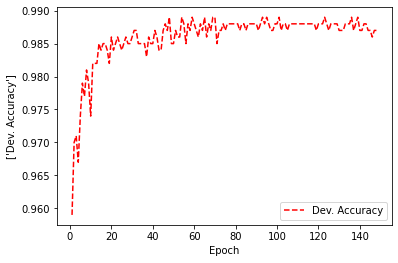

In [24]:
# Finally we call the function
grid_search(data_path, epochs, mode, model_name, h1, lr_grid, batch_size_grid, momentum_grid)